In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('virtual_matches_data.csv')

In [57]:
data.head()

,date,hour,home_team,away_team,score,home_goals,away_goals,datetime,odds_1,result,over_under_25,odds_over_under_25,goal_no_goal,odds_goal_no_goal
0,14-05-2025,22:00:00,Colombia,Nigeria,0-2,0,2,2025-05-14 22:00:00,201,2,"Under 2,5 Goal",129,NG,139
1,14-05-2025,21:55:00,Serbia,Spagna,1-0,1,0,2025-05-14 21:55:00,267,1,"Under 2,5 Goal",130,NG,139
2,14-05-2025,21:50:00,Olanda,Turchia,2-0,2,0,2025-05-14 21:50:00,208,1,"Under 2,5 Goal",130,NG,139
3,14-05-2025,21:45:00,Germania,Svizzera,1-2,1,2,2025-05-14 21:45:00,248,2,"Over 2,5 Goal",251,GG,225
4,14-05-2025,21:40:00,Francia,Serbia,1-2,1,2,2025-05-14 21:40:00,247,2,"Over 2,5 Goal",251,GG,225


In [58]:
export_model = data.head(50)
export_model.to_csv('export_model.csv', index=False)

In [59]:

export_model.columns.to_list()

['date',
 'hour',
 'home_team',
 'away_team',
 'score',
 'home_goals',
 'away_goals',
 'datetime',
 'odds_1',
 'result',
 'over_under_25',
 'odds_over_under_25',
 'goal_no_goal',
 'odds_goal_no_goal']

In [60]:
data.result.value_counts(normalize=True)

result
2    0.372719
1    0.355906
X    0.271375
Name: proportion, dtype: float64

Let's analyze the distances between draws (matches with result 'X') and create a table showing:
1. The distribution of games between consecutive draws in specified ranges
2. Calculate percentages and cumulative percentages for each range

In [61]:
# Find indices where result is 'X' (draws)
draw_indices = data[data['result'] == 'X'].index

# Calculate distances between consecutive draws
distances = np.diff(draw_indices)

# Define the ranges for analysis
bins = [0, 1, 3, 5, 7, 10, 12, 15, float('inf')]
labels = ['0-1', '1-3', '3-5', '5-7', '7-10', '10-12', '12-15', '15+']

# Create distribution table
dist_df = pd.DataFrame({
    'Range': labels,
    'Count': pd.cut(distances, bins=bins, labels=labels).value_counts(),
})

# Calculate percentages and cumulative percentages
total = dist_df['Count'].sum()
dist_df['Percentage'] = (dist_df['Count'] / total * 100).round()
dist_df['Cumulative %'] = dist_df['Percentage'].cumsum().round()

# Sort by the ranges in original order
dist_df = dist_df.reindex(labels)
dist_df

,Range,Count,Percentage,Cumulative %
0-1,0-1,1984,26.0,26.0
1-3,1-3,2645,35.0,61.0
3-5,3-5,1417,19.0,80.0
5-7,5-7,707,9.0,89.0
7-10,7-10,505,7.0,96.0
10-12,10-12,152,2.0,98.0
12-15,12-15,90,1.0,99.0
15+,15+,69,1.0,100.0


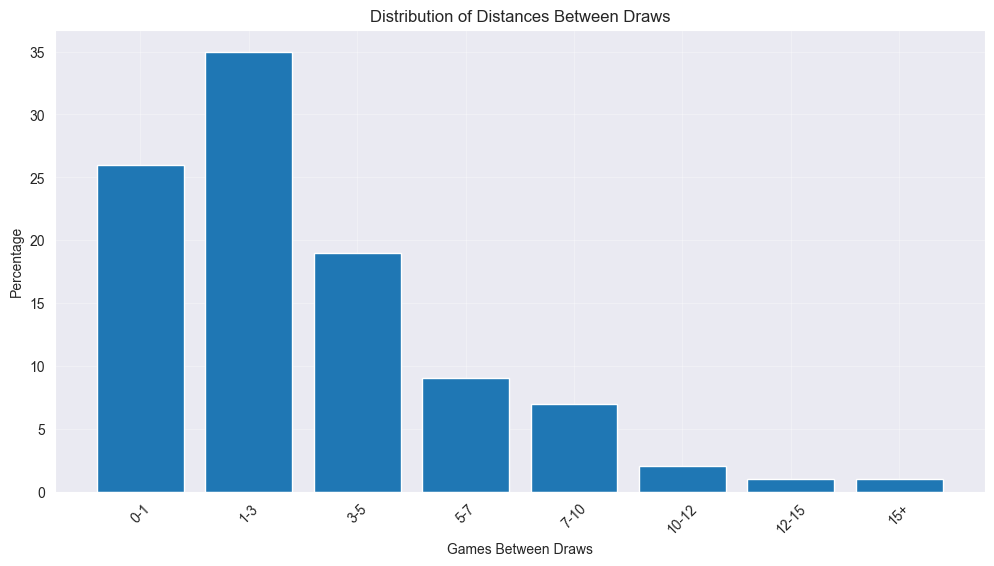

In [62]:
# Visualize the distribution
plt.figure(figsize=(12, 6))
plt.bar(dist_df.index, dist_df['Percentage'])
plt.title('Distribution of Distances Between Draws')
plt.xlabel('Games Between Draws')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


In [63]:
data.head()

,date,hour,home_team,away_team,score,home_goals,away_goals,datetime,odds_1,result,over_under_25,odds_over_under_25,goal_no_goal,odds_goal_no_goal
0,14-05-2025,22:00:00,Colombia,Nigeria,0-2,0,2,2025-05-14 22:00:00,201,2,"Under 2,5 Goal",129,NG,139
1,14-05-2025,21:55:00,Serbia,Spagna,1-0,1,0,2025-05-14 21:55:00,267,1,"Under 2,5 Goal",130,NG,139
2,14-05-2025,21:50:00,Olanda,Turchia,2-0,2,0,2025-05-14 21:50:00,208,1,"Under 2,5 Goal",130,NG,139
3,14-05-2025,21:45:00,Germania,Svizzera,1-2,1,2,2025-05-14 21:45:00,248,2,"Over 2,5 Goal",251,GG,225
4,14-05-2025,21:40:00,Francia,Serbia,1-2,1,2,2025-05-14 21:40:00,247,2,"Over 2,5 Goal",251,GG,225


In [64]:
import itertools

# Analisi strategia ottimizzata con gestione errori e metriche aggiuntive
try:
    # Calcolo statistiche squadre
    team_stats = pd.DataFrame(index=data['home_team'].unique())

    for team in team_stats.index:
        home_matches = data[data['home_team'] == team]
        away_matches = data[data['away_team'] == team]

        draw_rate_home = (home_matches['result'] == 'X').mean()
        draw_rate_away = (away_matches['result'] == 'X').mean()
        total_matches = len(home_matches) + len(away_matches)
        avg_odds = home_matches['odds_1'].mean()

        # Calcolo metriche aggiuntive
        draw_streak_home = max([len(list(g)) for k, g in itertools.groupby(home_matches['result']) if k == 'X'] or [0])
        draw_streak_away = max([len(list(g)) for k, g in itertools.groupby(away_matches['result']) if k == 'X'] or [0])

        team_stats.loc[team, 'draw_rate_home'] = draw_rate_home
        team_stats.loc[team, 'draw_rate_away'] = draw_rate_away
        team_stats.loc[team, 'total_matches'] = total_matches
        team_stats.loc[team, 'avg_odds'] = avg_odds
        team_stats.loc[team, 'max_draw_streak'] = max(draw_streak_home, draw_streak_away)

    # Analisi sequenze e pattern
    no_draw_streaks = []
    current_streak = 0
    hourly_stats = {}

    for idx, row in data.iterrows():
        hour = int(row['hour'].split(':')[0])
        if hour not in hourly_stats:
            hourly_stats[hour] = {'total': 0, 'draws': 0}
        hourly_stats[hour]['total'] += 1
        if row['result'] == 'X':
            hourly_stats[hour]['draws'] += 1
            if current_streak > 0:
                no_draw_streaks.append(current_streak)
            current_streak = 0
        else:
            current_streak += 1

    if current_streak > 0:
        no_draw_streaks.append(current_streak)

    streak_stats = pd.Series(no_draw_streaks).value_counts().sort_index()

    # Calcolo probabilità dopo serie negative
    prob_after_streak = {}
    for streak_length in range(1, 11):
        matches_after_streak = len([x for x in no_draw_streaks if x >= streak_length])
        draws_after_streak = sum(1 for x in no_draw_streaks if x == streak_length)
        if matches_after_streak > 0:
            prob_after_streak[streak_length] = draws_after_streak / matches_after_streak

    # Analisi oraria
    hourly_draw_rates = {hour: stats['draws'] / stats['total']
                         for hour, stats in hourly_stats.items()}

    print("\n=== Analisi Dettagliata Avanzata ===")
    print("\nSquadre con maggiore probabilità di pareggio (home):")
    print(team_stats.sort_values('draw_rate_home', ascending=False).head())

    print("\nDistribuzione serie senza pareggi:")
    print(streak_stats.head(10))

    print("\nProbabilità pareggio dopo serie negative:")
    for streak, prob in prob_after_streak.items():
        print(f"Dopo {streak} partite: {prob:.2%}")

    print("\nOrari con maggiore probabilità di pareggio:")
    sorted_hours = sorted(hourly_draw_rates.items(), key=lambda x: x[1], reverse=True)
    for hour, rate in sorted_hours[:5]:
        print(f"Ora {hour:02d}:00 - {rate:.2%}")

    print("\nStrategia Ottimizzata:")
    print("1. Puntata base: 5€")
    print("2. Attendi 3-4 partite senza X")
    print("3. Verifica squadre con draw_rate > 27%")
    print("4. Massimo 2 raddoppi")
    print("5. Stop loss: -20€")
    print("6. Take profit: +15€")
    print("7. Pausa di 1 partita dopo ogni puntata")
    print("8. Privilegia orari con alta % di X")
    print("9. Evita squadre in serie positiva > 2 vittorie")
    print("10. Raddoppia solo se odds > 3.0")

except Exception as e:
    print(f"Errore nell'analisi: {str(e)}")



=== Analisi Dettagliata Avanzata ===

Squadre con maggiore probabilità di pareggio (home):
          draw_rate_home  draw_rate_away  total_matches    avg_odds  \
Belgio          0.317480        0.272222         1799.0  258.324892   
Italia          0.284392        0.262077         3422.0  256.629858   
Brasile         0.280154        0.288889         2698.0  255.805389   
Olanda          0.276182        0.269855         3421.0  257.240037   
Colombia        0.275641        0.334262         2699.0  254.882906   

          max_draw_streak  
Belgio                6.0  
Italia                6.0  
Brasile               6.0  
Olanda                5.0  
Colombia              6.0  

Distribuzione serie senza pareggi:
1     1544
2     1101
3      825
4      592
5      405
6      303
7      221
8      160
9      124
10      91
Name: count, dtype: int64

Probabilità pareggio dopo serie negative:
Dopo 1 partite: 27.64%
Dopo 2 partite: 27.24%
Dopo 3 partite: 28.05%
Dopo 4 partite: 27.98%
Dopo 5

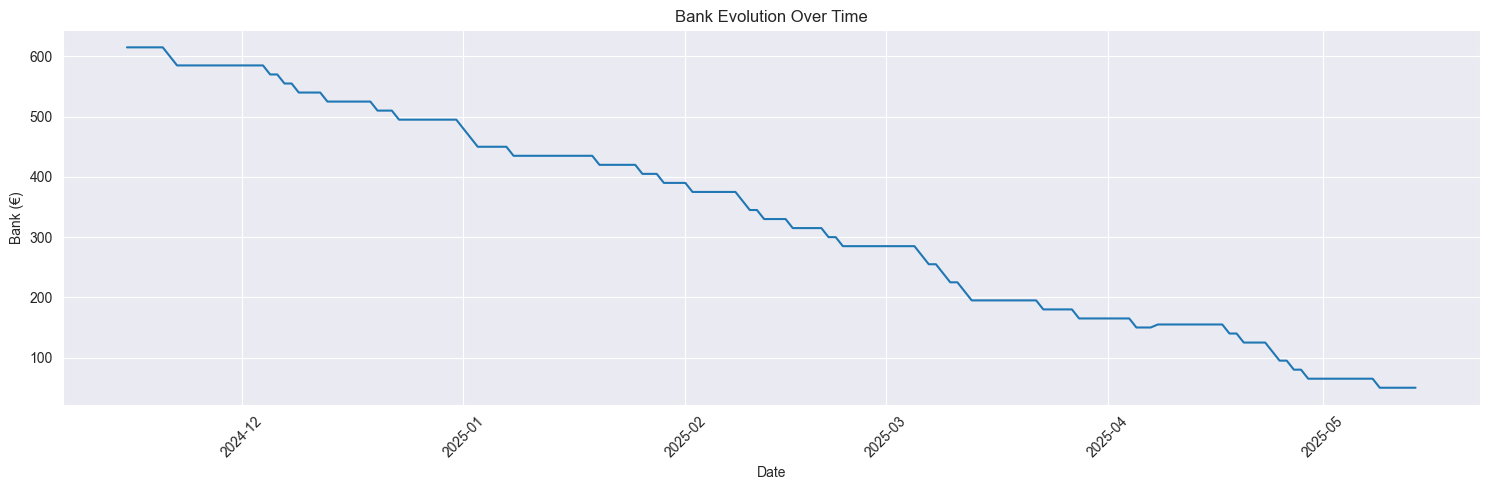


=== Simulation Results ===
Initial Bank: 50
Final Bank: 615
Total Profit: 565
Total Days: 181
Profitable Days: 38
Average Daily Profit: 3.12€
Max Daily Profit: 15
Max Daily Loss: -5
Max Bank: 615
Min Bank: 50


In [65]:
def simulate_betting_strategy(data, initial_bank=50, base_bet=5, max_doubles=2,
                              min_wait_games=3, max_wait_games=4, min_draw_rate=0.27,
                              stop_loss=-20, take_profit=15):
    results = []
    bank = initial_bank
    daily_profits = []
    current_day = None
    daily_profit = 0
    waiting_games = 0
    current_bet = base_bet
    doubles_count = 0

    # Calculate team stats
    team_stats = {}
    for team in set(data['home_team'].unique()) | set(data['away_team'].unique()):
        home_matches = data[data['home_team'] == team]
        away_matches = data[data['away_team'] == team]

        draw_rate_home = (home_matches['result'] == 'X').mean()
        draw_rate_away = (away_matches['result'] == 'X').mean()

        team_stats[team] = {
            'draw_rate_home': draw_rate_home if not pd.isna(draw_rate_home) else 0,
            'draw_rate_away': draw_rate_away if not pd.isna(draw_rate_away) else 0
        }

    # Convert date to datetime
    data['datetime'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

    for idx, match in data.iterrows():
        match_date = match['datetime'].date()

        # Track daily profits
        if current_day is None:
            current_day = match_date
        elif current_day != match_date:
            daily_profits.append({'date': current_day, 'profit': daily_profit, 'final_bank': bank})
            daily_profit = 0
            current_day = match_date
            waiting_games = 0
            current_bet = base_bet
            doubles_count = 0

        # Check if we should reset after reaching stop loss or take profit
        if daily_profit <= stop_loss or daily_profit >= take_profit:
            waiting_games = 0
            current_bet = base_bet
            doubles_count = 0
            continue

        # Increment waiting counter
        waiting_games += 1

        # Check betting conditions
        home_team = match['home_team']
        away_team = match['away_team']

        home_draw_rate = team_stats[home_team]['draw_rate_home']
        away_draw_rate = team_stats[away_team]['draw_rate_away']

        conditions_met = (
                waiting_games >= min_wait_games and
                waiting_games <= max_wait_games and
                (home_draw_rate > min_draw_rate or away_draw_rate > min_draw_rate) and
                match['odds_1'] > 300  # odds > 3.0
        )

        if conditions_met:
            results.append({
                'date': match_date,
                'hour': match['hour'],
                'teams': f"{match['home_team']} vs {match['away_team']}",
                'bet': current_bet,
                'result': match['result'],
                'bank_before': bank,
                'daily_profit_before': daily_profit
            })

            if match['result'] == 'X':  # Win
                profit = current_bet * 3  # Assuming X odds around 3.0
                bank += profit
                daily_profit += profit
                current_bet = base_bet
                doubles_count = 0
            else:  # Loss
                bank -= current_bet
                daily_profit -= current_bet
                if doubles_count < max_doubles:
                    current_bet *= 2
                    doubles_count += 1
                else:
                    current_bet = base_bet
                    doubles_count = 0

            results[-1].update({
                'bank_after': bank,
                'daily_profit_after': daily_profit
            })

            waiting_games = 0

    # Add last day
    if current_day is not None:
        daily_profits.append({'date': current_day, 'profit': daily_profit, 'final_bank': bank})

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    daily_profits_df = pd.DataFrame(daily_profits)

    # Calculate statistics
    stats = {
        'Initial Bank': initial_bank,
        'Final Bank': bank,
        'Total Profit': bank - initial_bank,
        'Total Days': len(daily_profits_df),
        'Profitable Days': len(daily_profits_df[daily_profits_df['profit'] > 0]),
        'Average Daily Profit': daily_profits_df['profit'].mean(),
        'Max Daily Profit': daily_profits_df['profit'].max(),
        'Max Daily Loss': daily_profits_df['profit'].min(),
        'Max Bank': daily_profits_df['final_bank'].max(),
        'Min Bank': daily_profits_df['final_bank'].min()
    }

    # Plotting
    plt.figure(figsize=(15, 5))
    plt.plot(daily_profits_df['date'], daily_profits_df['final_bank'])
    plt.title('Bank Evolution Over Time')
    plt.xlabel('Date')
    plt.ylabel('Bank (€)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\n=== Simulation Results ===")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}€" if isinstance(value, float) else f"{key}: {value}")

    return results_df, daily_profits_df, stats


# Run simulation
results_df, daily_profits_df, stats = simulate_betting_strategy(data)


Ottimizzazione della Soglia per la Regola Euristica basata su 'odds_1'

Valori di 'odds_1' *sempre* associati a un pareggio (23 valori).
Valori di 'odds_1' *a volte* associati a un pareggio (3 valori).

--- Risultati Ottimizzazione Soglia (massimizzando F1-Score per Pareggio) ---
Miglior Soglia P(Draw) trovata: 0.05
  Miglior F1-Score Pareggio: 0.9905
  Precision Pareggio (alla miglior soglia): 0.9812
  Recall Pareggio (alla miglior soglia): 1.0000
  TP (Pareggi Corretti): 7570
  FN (Pareggi Mancati): 0
  FP (Falsi Allarmi): 145
  TN (Non-Pareggi Corretti): 20180


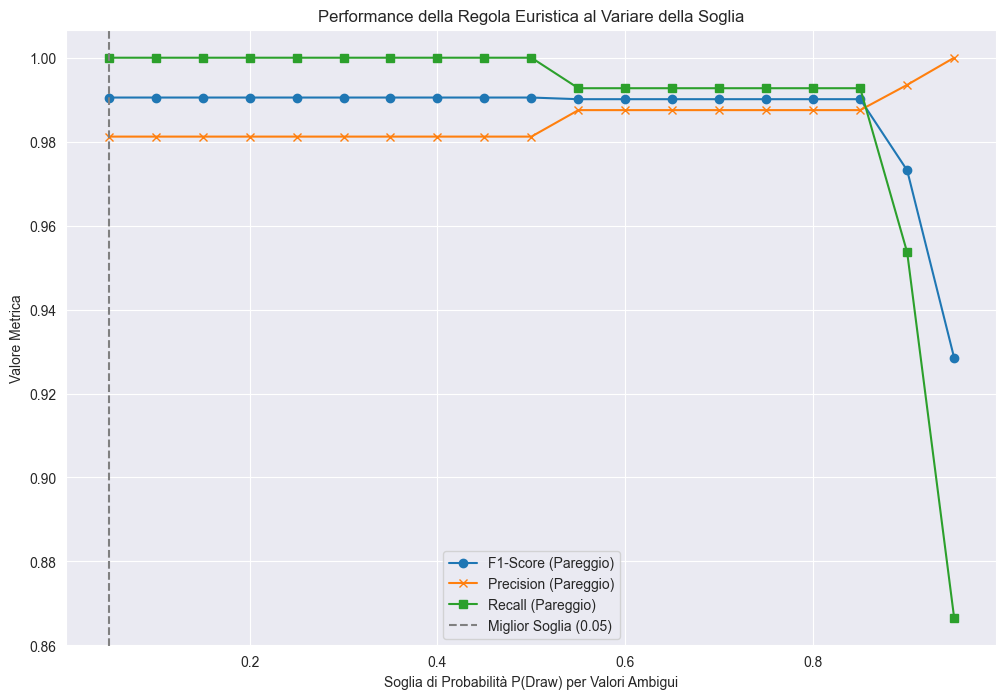


--- Valutazione della Regola Euristica con Soglia Ottimale P(Draw) > 0.05 ---

Matrice di Confusione (Regola Euristica Ottimale):
[[20180   145]
 [    0  7570]]

  Pareggi effettivi previsti correttamente (TP): 7570
  Pareggi effettivi previsti erroneamente come 'Non Pareggio' (FN - Pareggi Mancati): 0
  Non-pareggi effettivi previsti erroneamente come 'Pareggio' (FP - Falsi Allarmi): 145
  Non-pareggi effettivi previsti correttamente (TN): 20180

Classification Report (Regola Euristica Ottimale):
                  precision    recall  f1-score   support

Non Pareggio (0)       1.00      0.99      1.00     20325
    Pareggio (1)       0.98      1.00      0.99      7570

        accuracy                           0.99     27895
       macro avg       0.99      1.00      0.99     27895
    weighted avg       0.99      0.99      0.99     27895


Numero di Falsi Positivi (Regola Ottimale): 145
Valori di 'odds_1' per i Falsi Positivi della Regola Ottimale (primi 10):
odds_1
310    50
312  

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Carica il dataset
try:
    df = pd.read_csv('virtual_matches_data.csv')
except FileNotFoundError:
    print("Errore: Il file 'virtual_matches_data.csv' non è stato trovato.")
    exit()

# --- Ricrea 'original_result' e 'is_draw' come nello script del modello ---
if 'home_goals' in df.columns and 'away_goals' in df.columns:
    def determine_original_result(row):
        if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
            return np.nan
        if row['home_goals'] > row['away_goals']:
            return '1'
        elif row['home_goals'] < row['away_goals']:
            return '2'
        else:
            return 'X'
    df['original_result'] = df.apply(determine_original_result, axis=1)
    df.dropna(subset=['original_result'], inplace=True)
    df['is_draw'] = df['original_result'].apply(lambda x: 1 if x == 'X' else 0)
else:
    print("Errore: Colonne 'home_goals' o 'away_goals' mancanti.")
    exit()

if 'odds_1' not in df.columns:
    print("Errore: La colonna 'odds_1' non è presente.")
    exit()

print("Ottimizzazione della Soglia per la Regola Euristica basata su 'odds_1'\n")

# --- 1. Identificazione dei Valori di odds_1 (come nello script precedente) ---
all_odds_values = df['odds_1'].unique()
consistent_draw_odds = []
ambiguous_odds_info = {}

for val in sorted(all_odds_values):
    draw_count = df[(df['odds_1'] == val) & (df['is_draw'] == 1)].shape[0]
    non_draw_count = df[(df['odds_1'] == val) & (df['is_draw'] == 0)].shape[0]

    if draw_count > 0 and non_draw_count == 0:
        consistent_draw_odds.append(val)
    elif draw_count > 0 and non_draw_count > 0:
        total_count = draw_count + non_draw_count
        draw_probability = draw_count / total_count
        ambiguous_odds_info[val] = {
            'draw_count': draw_count,
            'non_draw_count': non_draw_count,
            'total_count': total_count,
            'draw_probability': draw_probability
        }
consistent_draw_odds.sort() # Assicura che la lista sia ordinata

print(f"Valori di 'odds_1' *sempre* associati a un pareggio ({len(consistent_draw_odds)} valori).")
# print(consistent_draw_odds) # Deselezionare per vedere la lista completa
print(f"Valori di 'odds_1' *a volte* associati a un pareggio ({len(ambiguous_odds_info)} valori).")
# for val, info in sorted(ambiguous_odds_info.items()):
#     print(f"  odds_1 = {val}: P(Draw) = {info['draw_probability']:.2f} ({info['draw_count']}D / {info['non_draw_count']}ND)")


# --- 2. Ottimizzazione della Soglia di Probabilità per la Regola Euristica ---
thresholds_to_test = np.arange(0.05, 1.0, 0.05) # Testiamo soglie da 0.05 a 0.95
best_f1_draw = -1
best_threshold = -1
best_metrics = {}
results_by_threshold = []

y_true = df['is_draw']

for current_threshold in thresholds_to_test:
    def predict_draw_heuristic_dynamic(odds_1_value, threshold):
        if odds_1_value in consistent_draw_odds:
            return 1
        elif odds_1_value in ambiguous_odds_info:
            if ambiguous_odds_info[odds_1_value]['draw_probability'] > threshold:
                return 1
            else:
                return 0
        else:
            return 0

    df['heuristic_prediction'] = df['odds_1'].apply(lambda x: predict_draw_heuristic_dynamic(x, current_threshold))
    y_pred_heuristic = df['heuristic_prediction']

    f1_draw = f1_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)
    precision_draw = precision_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)
    recall_draw = recall_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)

    cm = confusion_matrix(y_true, y_pred_heuristic)
    if cm.shape == (2,2): # Assicura che ci siano entrambe le classi nelle predizioni per un unpacking sicuro
        TN, FP, FN, TP = cm.ravel()
    else: # Gestione semplificata se una classe non è predetta (improbabile con auto_class_weights)
        # Questo è un fallback, la logica di estrazione potrebbe necessitare di aggiustamenti
        # a seconda di come sklearn costruisce la cm con classi mancanti
        TP = cm[1,1] if cm.shape == (2,2) else np.sum((y_true==1) & (y_pred_heuristic==1))
        FN = np.sum((y_true==1) & (y_pred_heuristic==0))
        FP = np.sum((y_true==0) & (y_pred_heuristic==1))
        TN = np.sum((y_true==0) & (y_pred_heuristic==0))


    results_by_threshold.append({
        'threshold': current_threshold,
        'f1_draw': f1_draw,
        'precision_draw': precision_draw,
        'recall_draw': recall_draw,
        'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN
    })

    if f1_draw > best_f1_draw:
        best_f1_draw = f1_draw
        best_threshold = current_threshold
        best_metrics = results_by_threshold[-1] # Salva l'intero dizionario delle metriche

print("\n--- Risultati Ottimizzazione Soglia (massimizzando F1-Score per Pareggio) ---")
print(f"Miglior Soglia P(Draw) trovata: {best_threshold:.2f}")
print(f"  Miglior F1-Score Pareggio: {best_metrics['f1_draw']:.4f}")
print(f"  Precision Pareggio (alla miglior soglia): {best_metrics['precision_draw']:.4f}")
print(f"  Recall Pareggio (alla miglior soglia): {best_metrics['recall_draw']:.4f}")
print(f"  TP (Pareggi Corretti): {best_metrics['TP']}")
print(f"  FN (Pareggi Mancati): {best_metrics['FN']}")
print(f"  FP (Falsi Allarmi): {best_metrics['FP']}")
print(f"  TN (Non-Pareggi Corretti): {best_metrics['TN']}")

# Visualizzazione delle metriche al variare della soglia
results_df = pd.DataFrame(results_by_threshold)
plt.figure(figsize=(12, 8))
plt.plot(results_df['threshold'], results_df['f1_draw'], marker='o', label='F1-Score (Pareggio)')
plt.plot(results_df['threshold'], results_df['precision_draw'], marker='x', label='Precision (Pareggio)')
plt.plot(results_df['threshold'], results_df['recall_draw'], marker='s', label='Recall (Pareggio)')
plt.axvline(x=best_threshold, color='grey', linestyle='--', label=f'Miglior Soglia ({best_threshold:.2f})')
plt.xlabel("Soglia di Probabilità P(Draw) per Valori Ambigui")
plt.ylabel("Valore Metrica")
plt.title("Performance della Regola Euristica al Variare della Soglia")
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Analisi Dettagliata con la Soglia Ottimale ---
OPTIMAL_THRESHOLD = best_threshold
df['optimal_heuristic_prediction'] = df['odds_1'].apply(lambda x: predict_draw_heuristic_dynamic(x, OPTIMAL_THRESHOLD))
y_pred_optimal_heuristic = df['optimal_heuristic_prediction']

print(f"\n--- Valutazione della Regola Euristica con Soglia Ottimale P(Draw) > {OPTIMAL_THRESHOLD:.2f} ---")
print("\nMatrice di Confusione (Regola Euristica Ottimale):")
# Ricalcola la matrice di confusione con la soglia ottimale per coerenza, anche se già in best_metrics
conf_matrix_optimal = confusion_matrix(y_true, y_pred_optimal_heuristic)
print(conf_matrix_optimal)
if conf_matrix_optimal.shape == (2,2):
    TN_opt, FP_opt, FN_opt, TP_opt = conf_matrix_optimal.ravel()
    print(f"\n  Pareggi effettivi previsti correttamente (TP): {TP_opt}")
    print(f"  Pareggi effettivi previsti erroneamente come 'Non Pareggio' (FN - Pareggi Mancati): {FN_opt}")
    print(f"  Non-pareggi effettivi previsti erroneamente come 'Pareggio' (FP - Falsi Allarmi): {FP_opt}")
    print(f"  Non-pareggi effettivi previsti correttamente (TN): {TN_opt}")

print("\nClassification Report (Regola Euristica Ottimale):")
print(classification_report(y_true, y_pred_optimal_heuristic, target_names=['Non Pareggio (0)', 'Pareggio (1)'], zero_division=0))

# Analisi dei Falsi Positivi e Negativi per la regola ottimale
fp_optimal_heuristic_df = df[(df['optimal_heuristic_prediction'] == 1) & (df['is_draw'] == 0)]
print(f"\nNumero di Falsi Positivi (Regola Ottimale): {fp_optimal_heuristic_df.shape[0]}")
if not fp_optimal_heuristic_df.empty:
    print("Valori di 'odds_1' per i Falsi Positivi della Regola Ottimale (primi 10):")
    print(fp_optimal_heuristic_df['odds_1'].value_counts().head(10))

fn_optimal_heuristic_df = df[(df['optimal_heuristic_prediction'] == 0) & (df['is_draw'] == 1)]
print(f"\nNumero di Falsi Negativi (Regola Ottimale): {fn_optimal_heuristic_df.shape[0]}")
if not fn_optimal_heuristic_df.empty:
    print("Valori di 'odds_1' per i Falsi Negativi della Regola Ottimale (primi 10):")
    print(fn_optimal_heuristic_df['odds_1'].value_counts().head(10))


# --- 4. Confronto Finale con il Modello CatBoost ---
print("\n--- Confronto Finale con il Modello CatBoost (solo odds_1) ---")
print("Il modello CatBoost (con solo odds_1) aveva riportato (dal tuo output precedente):")
CATBOOST_FN = 0
CATBOOST_FP = 31 # Basato sul tuo ultimo output per CatBoost con solo odds_1
print(f"  - Pareggi Mancati (FN) CatBoost: {CATBOOST_FN}")
print(f"  - Falsi Allarmi (FP) CatBoost: {CATBOOST_FP}")

print(f"\nLa Regola Euristica Ottimale (Soglia P(Draw) > {OPTIMAL_THRESHOLD:.2f}) ha prodotto:")
if conf_matrix_optimal.shape == (2,2):
    print(f"  - Pareggi Mancati (FN) Regola Ottimale: {FN_opt}")
    print(f"  - Falsi Allarmi (FP) Regola Ottimale: {FP_opt}")
else:
    print("  - Statistiche FN/FP per la regola euristica ottimale non calcolabili direttamente.")


print("\nConsiderazioni:")
print("Se FN (Regola Ottimale) è > FN (CatBoost), la regola euristica manca più pareggi.")
print("Se FP (Regola Ottimale) è > FP (CatBoost), la regola euristica ha più falsi allarmi.")
print("CatBoost, anche con una singola feature, può applicare logiche di splitting più complesse")
print("di una singola soglia di probabilità globale per i valori ambigui, spiegando potenziali differenze.")



In [67]:
import pandas as pd
import numpy as np

# Dati derivati dall'analisi del dataset 'virtual_matches_data.csv'
# Questi valori sono basati sull'output che hai fornito precedentemente.
# Se il tuo dataset cambia o un'analisi più approfondita fornisce valori diversi,
# questi dovrebbero essere aggiornati.

# Valori di odds_1 che sono SEMPRE associati a un pareggio nel dataset analizzato
# (basato sul tuo output: 23 valori, da 302 a 328 con alcune eccezioni)
CONSISTENT_DRAW_ODDS_LIST = [
    302, 303, 305, 306, 307, 308, 309, 311, 313, 314, 315, 316, 317,
    318, 319, 320, 321, 322, 323, 324, 325, 327, 328
]

# Valori di odds_1 che sono A VOLTE associati a un pareggio, con la loro probabilità storica
# (basato sul tuo output)
AMBIGUOUS_ODDS_DATA = {
    310: {'draw_probability': 0.52},  # P(Draw) = 0.52 (55 Pareggi / 50 Non-Pareggi)
    312: {'draw_probability': 0.86},  # P(Draw) = 0.86 (296 Pareggi / 48 Non-Pareggi)
    326: {'draw_probability': 0.93}   # P(Draw) = 0.93 (655 Pareggi / 47 Non-Pareggi)
}

def predici_pareggio_con_regola(odds_1_value, optimal_probability_threshold):
    """
    Predice se una partita finirà in pareggio (1) o no (0)
    basandosi sul valore di odds_1 e una soglia di probabilità ottimale.

    La logica è:
    1. Se odds_1_value è nella lista dei valori che storicamente sono SEMPRE pareggi,
       predice pareggio (1).
    2. Se odds_1_value è nella lista dei valori AMBIGUI:
       a. Se la sua probabilità storica di essere un pareggio è MAGGIORE della
          optimal_probability_threshold, predice pareggio (1).
       b. Altrimenti, predice non-pareggio (0).
    3. Se odds_1_value non rientra in nessuno dei casi precedenti (cioè, storicamente
       non è mai stato un pareggio o è stato solo non-pareggio), predice non-pareggio (0).

    Args:
        odds_1_value (int or float): Il valore della quota odds_1 per la partita.
        optimal_probability_threshold (float): La soglia di probabilità ottimale
                                               determinata dall'analisi precedente
                                               (es. dallo script optimizing_heuristic_threshold_script).
                                               Usata per i valori ambigui di odds_1.
    Returns:
        int: 1 se la predizione è pareggio, 0 altrimenti.
    """
    # Controlla se l'input è un numero valido, altrimenti restituisce 0 (o gestisci l'errore come preferisci)
    if pd.isna(odds_1_value):
        return 0 # O potresti sollevare un'eccezione o restituire np.nan

    try:
        # Assicura che odds_1_value sia un intero per il confronto con le chiavi/liste
        # Questo potrebbe non essere necessario se odds_1 è sempre intero nel tuo df
        current_odds = int(odds_1_value)
    except ValueError:
        # Se odds_1_value non può essere convertito in intero (es. stringa non numerica)
        return 0 # O gestisci l'errore

    if current_odds in CONSISTENT_DRAW_ODDS_LIST:
        return 1  # Caso 1: Sempre pareggio
    elif current_odds in AMBIGUOUS_ODDS_DATA:
        # Caso 2: Valore ambiguo
        if AMBIGUOUS_ODDS_DATA[current_odds]['draw_probability'] > optimal_probability_threshold:
            return 1  # Caso 2a: Abbastanza probabile che sia pareggio
        else:
            return 0  # Caso 2b: Non abbastanza probabile
    else:
        # Caso 3: Storicamente non associato a pareggi (o solo a non-pareggi)
        return 0

# --- Esempio di come utilizzare la funzione con un DataFrame Pandas ---
if __name__ == '__main__':
    # 1. Determina la tua OPTIMAL_PROBABILITY_THRESHOLD
    #    Questa soglia dovrebbe essere il valore 'best_threshold'
    #    ottenuto dall'esecuzione dello script 'optimizing_heuristic_threshold_script.py'.
    #    Per questo esempio, userò un valore ipotetico.
    #    SOSTITUISCI QUESTO VALORE CON LA TUA SOGLIA OTTIMALE!
    #    Ad esempio, se lo script di ottimizzazione ha trovato che 0.65 è la migliore soglia:
    #    OPTIMAL_THRESHOLD = 0.65
    #    Se non hai ancora eseguito l'ottimizzazione, puoi usare 0.80 come punto di partenza
    #    basandoti sulle analisi precedenti, ma l'ottimizzazione è raccomandata.

    # Supponiamo che l'ottimizzazione abbia trovato questa soglia (valore di esempio!)
    OPTIMAL_THRESHOLD_ESEMPIO = 0.60 # <-- SOSTITUISCI CON LA TUA SOGLIA OTTIMALE
    print(f"Utilizzo della soglia di probabilità ottimale (esempio): {OPTIMAL_THRESHOLD_ESEMPIO}\n")

    # 2. Carica il tuo DataFrame (o usa quello già caricato se questo script è parte di un flusso più grande)
    try:
        df_esempio = pd.read_csv('virtual_matches_data.csv')
        # Assicurati che la colonna 'odds_1' esista
        if 'odds_1' not in df_esempio.columns:
            raise ValueError("La colonna 'odds_1' non è presente nel DataFrame.")

        # 3. Applica la funzione per creare una nuova colonna di predizioni
        df_esempio['predizione_pareggio_regola'] = df_esempio['odds_1'].apply(
            lambda x: predici_pareggio_con_regola(x, OPTIMAL_THRESHOLD_ESEMPIO)
        )

        # 4. Mostra le prime righe con la nuova colonna e la distribuzione delle predizioni
        print("Prime righe del DataFrame con la colonna 'predizione_pareggio_regola':")
        print(df_esempio[['odds_1', 'predizione_pareggio_regola']].head(10))

        print("\nDistribuzione delle predizioni della regola:")
        print(df_esempio['predizione_pareggio_regola'].value_counts(normalize=True))

        # (Opzionale) Se hai anche la colonna 'is_draw' reale nel df_esempio, puoi valutare questa regola:
        if 'home_goals' in df_esempio.columns and 'away_goals' in df_esempio.columns:
            def determine_original_result(row):
                if pd.isna(row['home_goals']) or pd.isna(row['away_goals']): return np.nan
                if row['home_goals'] > row['away_goals']: return '1'
                elif row['home_goals'] < row['away_goals']: return '2'
                else: return 'X'
            df_esempio['original_result'] = df_esempio.apply(determine_original_result, axis=1)
            df_esempio.dropna(subset=['original_result'], inplace=True) # Rimuovi righe dove non si può determinare
            df_esempio['is_draw_reale'] = df_esempio['original_result'].apply(lambda x: 1 if x == 'X' else 0)

            # Rimuovi NaN da 'predizione_pareggio_regola' se 'odds_1' aveva NaN e la funzione ha restituito NaN
            # (la versione attuale della funzione restituisce 0 per odds_1 NaN, quindi questo potrebbe non essere necessario)
            # df_esempio.dropna(subset=['predizione_pareggio_regola'], inplace=True)


            # Assicurati che i DataFrame/Series per la valutazione siano allineati e non contengano NaN
            # Questo è un punto critico se ci sono stati dropna selettivi.
            # Per sicurezza, potremmo filtrare il df per le righe dove entrambe le colonne sono valide.
            df_valutazione = df_esempio.dropna(subset=['is_draw_reale', 'predizione_pareggio_regola'])

            print("\nValutazione della Regola Euristica sull'intero dataset (usando la soglia di esempio):")
            if not df_valutazione.empty:
                from sklearn.metrics import classification_report, confusion_matrix
                print(confusion_matrix(df_valutazione['is_draw_reale'], df_valutazione['predizione_pareggio_regola']))
                print(classification_report(df_valutazione['is_draw_reale'], df_valutazione['predizione_pareggio_regola'], zero_division=0))
            else:
                print("Non è possibile valutare la regola perché non ci sono dati validi dopo la gestione dei NaN.")
        else:
            print("\nPer valutare la regola, assicurati che le colonne 'home_goals' e 'away_goals' siano presenti per calcolare 'is_draw_reale'.")


    except FileNotFoundError:
        print("Errore nell'esempio: Il file 'virtual_matches_data.csv' non è stato trovato.")
    except ValueError as ve:
        print(f"Errore nell'esempio: {ve}")
    except Exception as e:
        print(f"Errore imprevisto nell'esempio: {e}")



Utilizzo della soglia di probabilità ottimale (esempio): 0.6

Prime righe del DataFrame con la colonna 'predizione_pareggio_regola':
   odds_1  predizione_pareggio_regola
0     201                           0
1     267                           0
2     208                           0
3     248                           0
4     247                           0
5     276                           0
6     302                           1
7     233                           0
8     228                           0
9     231                           0

Distribuzione delle predizioni della regola:
predizione_pareggio_regola
0    0.727191
1    0.272809
Name: proportion, dtype: float64

Valutazione della Regola Euristica sull'intero dataset (usando la soglia di esempio):
[[20230    95]
 [   55  7515]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20325
           1       0.99      0.99      0.99      7570

    accuracy                     

In [68]:
import pandas as pd
import numpy as np
from typing import Union, Dict, List, Any

# Dati derivati dall'analisi del dataset 'virtual_matches_data.csv'
# Questi valori sono basati sull'output che hai fornito precedentemente.
# Se il tuo dataset 'data' attuale è diverso, o se l'analisi di ottimizzazione
# fornisce valori diversi, questi dovrebbero essere aggiornati.

# Valori di odds_1 che sono SEMPRE associati a un pareggio nel dataset analizzato
CONSISTENT_DRAW_ODDS_LIST: List[int] = [
    302, 303, 305, 306, 307, 308, 309, 311, 313, 314, 315, 316, 317,
    318, 319, 320, 321, 322, 323, 324, 325, 327, 328
]

# Valori di odds_1 che sono A VOLTE associati a un pareggio, con la loro probabilità storica
AMBIGUOUS_ODDS_DATA: Dict[int, Dict[str, float]] = {
    310: {'draw_probability': 0.52},
    312: {'draw_probability': 0.86},
    326: {'draw_probability': 0.93}
}

def predici_pareggio_con_regola(odds_1_value: Union[int, float, None],
                                optimal_probability_threshold: float) -> int:
    """
    Predice se una partita finirà in pareggio (1) o no (0)
    basandosi sul valore di odds_1 e una soglia di probabilità ottimale.

    Args:
        odds_1_value: Il valore della quota odds_1 per la partita.
        optimal_probability_threshold: La soglia di probabilità ottimale
                                       determinata dall'analisi precedente.
    Returns:
        int: 1 se la predizione è pareggio, 0 altrimenti.
    """
    if pd.isna(odds_1_value):
        return 0  # Gestisce i NaN in input, classificandoli come non-pareggio

    try:
        # Assicura che odds_1_value sia trattato come intero per il confronto
        current_odds = int(float(odds_1_value))
    except ValueError:
        return 0  # Gestisce valori non convertibili in intero

    if current_odds in CONSISTENT_DRAW_ODDS_LIST:
        return 1  # Caso 1: Storicamente sempre pareggio
    elif current_odds in AMBIGUOUS_ODDS_DATA:
        # Caso 2: Valore ambiguo
        if AMBIGUOUS_ODDS_DATA[current_odds]['draw_probability'] > optimal_probability_threshold:
            return 1  # Caso 2a: Abbastanza probabile che sia pareggio
        else:
            return 0  # Caso 2b: Non abbastanza probabile
    else:
        # Caso 3: Storicamente non associato a pareggi (o solo a non-pareggi)
        return 0

# --- Esempio di come utilizzare la funzione e generare un DataFrame Informativo ---
if __name__ == '__main__':
    # 1. IMPOSTA LA TUA SOGLIA OTTIMALE QUI:
    #    Questo valore dovrebbe essere il 'best_threshold' ottenuto
    #    dall'esecuzione dello script 'optimizing_heuristic_threshold_script.py'.
    #    Sostituisci 0.60 con il valore che hai determinato per il tuo dataset.
    OPTIMAL_THRESHOLD: float = 0.60  # <-- SOSTITUISCI CON LA TUA SOGLIA OTTIMALE REALE
    print(f"Utilizzo della soglia di probabilità ottimale: {OPTIMAL_THRESHOLD}\n")

    # 2. Carica il tuo DataFrame principale
    try:
        # Assicurati che il nome del file sia corretto e il file sia accessibile
        data = pd.read_csv('virtual_matches_data.csv')
        print(f"Caricato il dataset 'virtual_matches_data.csv' con {data.shape[0]} righe.\n")

        # Verifica che la colonna 'odds_1' esista
        if 'odds_1' not in data.columns:
            raise ValueError("La colonna 'odds_1' non è presente nel DataFrame.")
        if not ('home_goals' in data.columns and 'away_goals' in data.columns):
            raise ValueError("Le colonne 'home_goals' e 'away_goals' sono necessarie per calcolare il risultato reale.")

        # 3. Preprocessing: Calcola 'is_draw_reale'
        def determine_original_result(row: pd.Series) -> Union[str, None]:
            if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
                return None # Usiamo None per coerenza con dropna
            if row['home_goals'] > row['away_goals']:
                return '1'
            elif row['home_goals'] < row['away_goals']:
                return '2'
            else:
                return 'X'

        data['original_result'] = data.apply(determine_original_result, axis=1)
        # Rimuovi righe dove non è stato possibile determinare il risultato originale (es. goal mancanti)
        data.dropna(subset=['original_result'], inplace=True)
        data['is_draw_reale'] = data['original_result'].apply(lambda x: 1 if x == 'X' else 0).astype(int)

        # Rimuovi righe dove odds_1 potrebbe essere NaN dopo il caricamento, se non già gestito
        # La funzione predici_pareggio_con_regola ora gestisce odds_1 NaN restituendo 0.
        # data.dropna(subset=['odds_1'], inplace=True) # Opzionale, dipende da come vuoi trattare odds_1 mancanti

        print(f"Numero di righe dopo il preprocessing iniziale: {data.shape[0]}\n")
        if data.empty:
            print("Il DataFrame è vuoto dopo il preprocessing. Impossibile continuare.")
            exit()

        # 4. Applica la funzione per creare la colonna di predizioni
        data['predizione_regola'] = data['odds_1'].apply(
            lambda x: predici_pareggio_con_regola(x, OPTIMAL_THRESHOLD)
        )

        # 5. Crea colonna per verifica correttezza
        data['corretta_predizione'] = (data['is_draw_reale'] == data['predizione_regola']).astype(int)

        # 6. Mostra un DataFrame Informativo
        print("--- DataFrame Informativo (Campione) ---")
        colonne_informative = ['odds_1', 'is_draw_reale', 'predizione_regola', 'corretta_predizione']
        # Campione casuale per vedere una varietà di casi
        campione_df = data[colonne_informative].sample(min(15, data.shape[0]), random_state=42)
        print(campione_df)
        print("-" * 50)

        # Mostra un campione di righe dove la predizione è errata
        errori_df = data[data['corretta_predizione'] == 0][colonne_informative]
        print(f"\n--- Campione di Predizioni Errate ({errori_df.shape[0]} totali) ---")
        if not errori_df.empty:
            print(errori_df.sample(min(10, errori_df.shape[0]), random_state=42))
            # Analisi più dettagliata dei valori di odds_1 per gli errori
            print("\nValori di 'odds_1' più comuni per i Falsi Positivi (predetto Pareggio, era Non-Pareggio):")
            fp_errors = data[(data['predizione_regola'] == 1) & (data['is_draw_reale'] == 0)]
            if not fp_errors.empty:
                print(fp_errors['odds_1'].value_counts().head())
            else:
                print("Nessun Falso Positivo.")

            print("\nValori di 'odds_1' più comuni per i Falsi Negativi (predetto Non-Pareggio, era Pareggio):")
            fn_errors = data[(data['predizione_regola'] == 0) & (data['is_draw_reale'] == 1)]
            if not fn_errors.empty:
                print(fn_errors['odds_1'].value_counts().head())
            else:
                print("Nessun Falso Negativo.")
        else:
            print("Nessuna predizione errata trovata!")
        print("-" * 50)

        # 7. Valutazione Complessiva della Regola Euristica sull'intero dataset
        print("\n--- Valutazione Complessiva della Regola Euristica ---")
        from sklearn.metrics import classification_report, confusion_matrix

        y_true_valutazione = data['is_draw_reale']
        y_pred_valutazione = data['predizione_regola']

        print("\nMatrice di Confusione (Regola Euristica sull'intero dataset):")
        cm = confusion_matrix(y_true_valutazione, y_pred_valutazione)
        print(cm)

        if cm.shape == (2,2): # Per estrarre TP, FP, FN, TN
            TN, FP, FN, TP = cm.ravel()
            print(f"  Pareggi effettivi previsti correttamente (TP): {TP}")
            print(f"  Pareggi effettivi previsti erroneamente come 'Non Pareggio' (FN - Pareggi Mancati): {FN}")
            print(f"  Non-pareggi effettivi previsti erroneamente come 'Pareggio' (FP - Falsi Allarmi): {FP}")
            print(f"  Non-pareggi effettivi previsti correttamente (TN): {TN}")
        else: # Fallback se la matrice non è 2x2 (es. una classe non ha predizioni)
            print("  Matrice di confusione non standard, impossibile estrarre TP/FP/FN/TN con ravel().")


        print("\nClassification Report (Regola Euristica sull'intero dataset):")
        print(classification_report(y_true_valutazione, y_pred_valutazione, target_names=['Non Pareggio (0)', 'Pareggio (1)'], zero_division=0))

    except FileNotFoundError:
        print(f"Errore: Il file 'virtual_matches_data.csv' non è stato trovato.")
    except ValueError as ve:
        print(f"Errore di valore: {ve}")
    except Exception as e:
        print(f"Errore imprevisto durante l'esecuzione: {e}")



Utilizzo della soglia di probabilità ottimale: 0.6

Caricato il dataset 'virtual_matches_data.csv' con 27895 righe.

Numero di righe dopo il preprocessing iniziale: 27895

--- DataFrame Informativo (Campione) ---
       odds_1  is_draw_reale  predizione_regola  corretta_predizione
13827     213              0                  0                    1
10951     319              1                  1                    1
23702     302              1                  1                    1
16255     267              0                  0                    1
11067     213              0                  0                    1
17116     234              0                  0                    1
23451     260              0                  0                    1
12800     210              0                  0                    1
21015     200              0                  0                    1
9851      240              0                  0                    1
23029     221              0

In [69]:
data.head()

,date,hour,home_team,away_team,score,home_goals,away_goals,datetime,odds_1,result,over_under_25,odds_over_under_25,goal_no_goal,odds_goal_no_goal,original_result,is_draw_reale,predizione_regola,corretta_predizione
0,14-05-2025,22:00:00,Colombia,Nigeria,0-2,0,2,2025-05-14 22:00:00,201,2,"Under 2,5 Goal",129,NG,139,2,0,0,1
1,14-05-2025,21:55:00,Serbia,Spagna,1-0,1,0,2025-05-14 21:55:00,267,1,"Under 2,5 Goal",130,NG,139,1,0,0,1
2,14-05-2025,21:50:00,Olanda,Turchia,2-0,2,0,2025-05-14 21:50:00,208,1,"Under 2,5 Goal",130,NG,139,1,0,0,1
3,14-05-2025,21:45:00,Germania,Svizzera,1-2,1,2,2025-05-14 21:45:00,248,2,"Over 2,5 Goal",251,GG,225,2,0,0,1
4,14-05-2025,21:40:00,Francia,Serbia,1-2,1,2,2025-05-14 21:40:00,247,2,"Over 2,5 Goal",251,GG,225,2,0,0,1


In [70]:
data[data.result == 'X'].sum

<bound method DataFrame.sum of              date      hour  home_team    away_team score  home_goals  \
6      14-05-2025  21:30:00   Colombia      Francia   2-2           2   
12     14-05-2025  21:00:00   Colombia    Danimarca   1-1           1   
18     14-05-2025  20:30:00   Germania      Turchia   1-1           1   
20     14-05-2025  20:20:00    Croazia     Germania   1-1           1   
21     14-05-2025  20:15:00   Colombia  Inghilterra   1-1           1   
...           ...       ...        ...          ...   ...         ...   
27884  15-11-2024  00:55:00  Danimarca      Nigeria   1-1           1   
27886  15-11-2024  00:45:00   Svizzera      Turchia   2-2           2   
27887  15-11-2024  00:40:00    Messico      Nigeria   0-0           0   
27889  15-11-2024  00:30:00     Italia      Messico   1-1           1   
27894  15-11-2024  00:05:00  Argentina       Belgio   2-2           2   

       away_goals             datetime  odds_1 result   over_under_25  \
6               2  

In [71]:
data.to_excel('predict_virtual_matches_data.xlsx')

tutti


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from typing import List, Dict, Union, Tuple, Optional, Any

# --- Funzioni Utilità ---
def determine_original_result(row: pd.Series) -> Union[str, None]:
    """
    Determina il risultato originale della partita (1, X, 2) basandosi sui goal.
    Restituisce None se i goal non sono disponibili.
    """
    if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
        return None
    if row['home_goals'] > row['away_goals']:
        return '1'  # Vittoria squadra di casa
    elif row['home_goals'] < row['away_goals']:
        return '2'  # Vittoria squadra ospite
    else:
        return 'X'  # Pareggio

def analyze_and_evaluate_outcome(df: pd.DataFrame,
                                 target_column_name: str,
                                 outcome_name: str,
                                 odds_column: str = 'odds_1') -> Tuple[Optional[List[Union[int, float]]], Optional[Dict[Union[int, float], Dict[str, float]]], Optional[float]]:
    """
    Analizza la relazione tra una colonna di quote (es. odds_1) e un esito specifico
    (es. vittoria casa, vittoria ospite). Trova una soglia ottimale per una regola
    euristica, valuta tale regola e stampa informazioni dettagliate.
    """
    print(f"\n--- Analisi Avanzata per: {outcome_name} (Target: {target_column_name}) ---")
    print(f"--- Basata sulla colonna: {odds_column} ---\n")

    if odds_column not in df.columns:
        print(f"Errore: La colonna di quote '{odds_column}' non è presente nel DataFrame.")
        return None, None, None

    if target_column_name not in df.columns:
        print(f"Errore: La colonna target '{target_column_name}' non è presente nel DataFrame.")
        return None, None, None

    # --- Statistiche Descrittive Iniziali ---
    print(f"\n--- Statistiche Descrittive per '{odds_column}' in relazione a '{outcome_name}' ---")
    if df[df[target_column_name] == 1].shape[0] > 0:
        outcome_occurs_stats = df[df[target_column_name] == 1][odds_column].describe()
    else:
        outcome_occurs_stats = pd.Series(dtype='float64', name=f"'{outcome_name}' (Target=1)").describe() # DataFrame vuoto per stats

    if df[df[target_column_name] == 0].shape[0] > 0:
        outcome_not_occurs_stats = df[df[target_column_name] == 0][odds_column].describe()
    else:
        outcome_not_occurs_stats = pd.Series(dtype='float64', name=f"Non '{outcome_name}' (Target=0)").describe()

    summary_stats_df = pd.DataFrame({
        f"'{outcome_name}' (Target=1)": outcome_occurs_stats,
        f"Non '{outcome_name}' (Target=0)": outcome_not_occurs_stats
    })
    print(summary_stats_df)
    print("-" * 40)

    # 1. Identificazione dei Valori della Colonna di Quote
    all_odds_values = df[odds_column].dropna().unique()
    consistent_outcome_odds: List[Union[int, float]] = []
    ambiguous_odds_info: Dict[Union[int, float], Dict[str, float]] = {}

    for val_float in sorted(all_odds_values):
        val = int(val_float)
        df_filtered_by_odds = df[df[odds_column] == val_float]
        outcome_count = df_filtered_by_odds[df_filtered_by_odds[target_column_name] == 1].shape[0]
        non_outcome_count = df_filtered_by_odds[df_filtered_by_odds[target_column_name] == 0].shape[0]

        if outcome_count > 0 and non_outcome_count == 0:
            consistent_outcome_odds.append(val)
        elif outcome_count > 0 and non_outcome_count > 0:
            total_count = outcome_count + non_outcome_count
            outcome_probability = outcome_count / total_count
            ambiguous_odds_info[val] = {
                'outcome_count': float(outcome_count),
                'non_outcome_count': float(non_outcome_count),
                'total_count': float(total_count),
                'outcome_probability': outcome_probability
            }
    consistent_outcome_odds.sort()

    print(f"\nValori di '{odds_column}' *sempre* associati a '{outcome_name}' ({len(consistent_outcome_odds)} valori).")
    if consistent_outcome_odds:
         print(f"  Esempio (primi/ultimi 5 se disponibili): {consistent_outcome_odds[:5]} ... {consistent_outcome_odds[-5:]}")

    print(f"\nValori di '{odds_column}' *a volte* associati a '{outcome_name}' ({len(ambiguous_odds_info)} valori):")
    if ambiguous_odds_info:
        for val_amb, info_amb in sorted(ambiguous_odds_info.items()):
            print(f"  {odds_column} = {val_amb}: P({outcome_name}) = {info_amb['outcome_probability']:.2f} ({int(info_amb['outcome_count'])} '{outcome_name}' / {int(info_amb['non_outcome_count'])} Non '{outcome_name}')")
    else:
        print("  Nessun valore ambiguo trovato.")

    # Top 5 quote per l'esito
    df_outcome_occurs = df[df[target_column_name] == 1]
    if not df_outcome_occurs.empty:
        top_5_odds_for_outcome = df_outcome_occurs[odds_column].value_counts().head(5)
        print(f"\nTop 5 valori di '{odds_column}' più frequenti quando si verifica '{outcome_name}':")
        for odd_value, count in top_5_odds_for_outcome.items():
            print(f"  Quota {odds_column} = {odd_value}: {count} volte")
    else:
        print(f"\nNessuna istanza di '{outcome_name}' trovata nel dataset per analizzare le top quote.")

    # 2. Ottimizzazione della Soglia di Probabilità
    thresholds_to_test = np.arange(0.05, 1.0, 0.05)
    best_f1_outcome = -1.0
    best_threshold = -1.0
    best_metrics: Dict[str, Any] = {}

    y_true = df[target_column_name]
    if y_true.nunique() < 2:
        print(f"\nLa colonna target '{target_column_name}' ha meno di due classi uniche ({y_true.nunique()}). Impossibile procedere con l'ottimizzazione e valutazione.")
        return consistent_outcome_odds, ambiguous_odds_info, None

    for current_threshold in thresholds_to_test:
        def predict_outcome_heuristic_dynamic(odds_val_float: Union[int, float, None], threshold: float) -> int:
            if pd.isna(odds_val_float): return 0
            odds_val = int(odds_val_float)
            if odds_val in consistent_outcome_odds:
                return 1
            elif odds_val in ambiguous_odds_info:
                if ambiguous_odds_info[odds_val]['outcome_probability'] > threshold:
                    return 1
                else:
                    return 0
            else:
                return 0

        df['heuristic_prediction'] = df[odds_column].apply(lambda x: predict_outcome_heuristic_dynamic(x, current_threshold))
        y_pred_heuristic = df['heuristic_prediction']
        f1_out = f1_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)

        if f1_out > best_f1_outcome:
            best_f1_outcome = f1_out
            best_threshold = current_threshold
            precision_out = precision_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)
            recall_out = recall_score(y_true, y_pred_heuristic, pos_label=1, zero_division=0)
            cm = confusion_matrix(y_true, y_pred_heuristic)
            tn, fp, fn, tp = 0,0,0,0
            if cm.shape == (2,2): tn, fp, fn, tp = cm.ravel()
            best_metrics = {
                'threshold': current_threshold, 'f1_outcome': f1_out,
                'precision_outcome': precision_out, 'recall_outcome': recall_out,
                'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn
            }

    if not best_metrics:
        print(f"\nImpossibile determinare una soglia ottimale per '{outcome_name}'.")
        return consistent_outcome_odds, ambiguous_odds_info, None

    print(f"\nRisultati Ottimizzazione Soglia per '{outcome_name}' (massimizzando F1-Score):")
    print(f"  Miglior Soglia P({outcome_name}) trovata: {best_metrics.get('threshold', -1):.2f}")
    print(f"  Miglior F1-Score {outcome_name}: {best_metrics.get('f1_outcome', -1):.4f}")
    print(f"  Precision {outcome_name} (alla miglior soglia): {best_metrics.get('precision_outcome', -1):.4f}")
    print(f"  Recall {outcome_name} (alla miglior soglia): {best_metrics.get('recall_outcome', -1):.4f}")
    print(f"  TP ({outcome_name} Corretti): {best_metrics.get('TP', -1)}")
    print(f"  FN ({outcome_name} Mancati): {best_metrics.get('FN', -1)}")
    print(f"  FP (Falsi Allarmi): {best_metrics.get('FP', -1)}")
    print(f"  TN (Non-{outcome_name} Corretti): {best_metrics.get('TN', -1)}")

    OPTIMAL_THRESHOLD_RULE = best_metrics.get('threshold', 0.5)

    # Applica la regola ottimale per l'analisi degli errori e il DataFrame informativo
    df['predizione_regola_ottimale'] = df[odds_column].apply(
        lambda x: predict_outcome_heuristic_dynamic(x, OPTIMAL_THRESHOLD_RULE)
    )
    df['corretta_pred_regola_ottimale'] = \
        (df[target_column_name] == df['predizione_regola_ottimale']).astype(int)

    print(f"\n--- DataFrame Informativo (Campione) per {outcome_name} con Regola Ottimale ---")
    colonne_informative = [odds_column, target_column_name, 'predizione_regola_ottimale', 'corretta_pred_regola_ottimale']
    colonne_informative = [col for col in colonne_informative if col in df.columns]

    if colonne_informative and not df.empty:
         sample_size = min(10, df.shape[0])
         if sample_size > 0 :
            print(df[colonne_informative].sample(sample_size, random_state=42))
         else:
            print("DataFrame vuoto, impossibile mostrare campione.")

    # --- Analisi Dettagliata Errori Regola Ottimale ---
    print(f"\n--- Analisi Dettagliata Errori Regola Ottimale per '{outcome_name}' (Soglia: {OPTIMAL_THRESHOLD_RULE:.2f}) ---")
    fp_optimal_df = df[(df['predizione_regola_ottimale'] == 1) & (df[target_column_name] == 0)]
    fn_optimal_df = df[(df['predizione_regola_ottimale'] == 0) & (df[target_column_name] == 1)]

    if not fp_optimal_df.empty:
        print(f"\nValori di '{odds_column}' che hanno causato Falsi Positivi ({fp_optimal_df.shape[0]} totali):")
        fp_odds_counts = fp_optimal_df[odds_column].value_counts()
        for odd_val_float, count in fp_odds_counts.head(10).items(): # Mostra i primi 10
            odd_val = int(odd_val_float)
            info_str = ""
            if odd_val in ambiguous_odds_info:
                prob = ambiguous_odds_info[odd_val]['outcome_probability']
                info_str = f" (P({outcome_name}) storica: {prob:.2f})"
            elif odd_val in consistent_outcome_odds: # Questo non dovrebbe accadere per un FP
                info_str = f" (Storicamente sempre {outcome_name} - anomalia?)"
            print(f"  Quota {odds_column} = {odd_val}: {count} errori FP{info_str}")
        if len(fp_odds_counts) > 10:
            print("  ...")
    else:
        print("\nNessun Falso Positivo con la regola ottimale.")

    if not fn_optimal_df.empty:
        print(f"\nValori di '{odds_column}' che hanno causato Falsi Negativi ({fn_optimal_df.shape[0]} totali):")
        fn_odds_counts = fn_optimal_df[odds_column].value_counts()
        for odd_val_float, count in fn_odds_counts.head(10).items(): # Mostra i primi 10
            odd_val = int(odd_val_float)
            info_str = ""
            if odd_val in ambiguous_odds_info:
                prob = ambiguous_odds_info[odd_val]['outcome_probability']
                info_str = f" (P({outcome_name}) storica: {prob:.2f} <= soglia)"
            # Non dovrebbe essere in consistent_outcome_odds se è un FN, ma controllo per sicurezza
            elif odd_val in consistent_outcome_odds:
                 info_str = f" (Questo è molto strano, era classificato come 'sempre {outcome_name}')"
            print(f"  Quota {odds_column} = {odd_val}: {count} errori FN{info_str}")
        if len(fn_odds_counts) > 10:
            print("  ...")
    else:
        print("\nNessun Falso Negativo con la regola ottimale.")

    return consistent_outcome_odds, ambiguous_odds_info, OPTIMAL_THRESHOLD_RULE


# --- Script Principale ---
if __name__ == '__main__':
    try:
        main_df = pd.read_csv('virtual_matches_data.csv')
        print(f"Caricato il dataset 'virtual_matches_data.csv' con {main_df.shape[0]} righe.\n")
    except FileNotFoundError:
        print("Errore: Il file 'virtual_matches_data.csv' non è stato trovato.")
        exit()

    if not ('home_goals' in main_df.columns and 'away_goals' in main_df.columns):
        print("Errore: Le colonne 'home_goals' e 'away_goals' sono necessarie per determinare i risultati reali.")
        exit()
    if 'odds_1' not in main_df.columns:
        print("Errore: La colonna 'odds_1' è necessaria per l'analisi.")
        exit()

    main_df['original_result'] = main_df.apply(determine_original_result, axis=1)
    main_df.dropna(subset=['original_result', 'odds_1'], inplace=True)

    if main_df.empty:
        print("Il DataFrame è vuoto dopo il preprocessing iniziale (rimozione NaN). Impossibile continuare.")
        exit()

    # --- Analisi per Vittorie Squadra di Casa (Home Wins) ---
    main_df['is_home_win'] = main_df['original_result'].apply(lambda x: 1 if x == '1' else 0).astype(int)
    print("\nDistribuzione 'is_home_win':")
    print(main_df['is_home_win'].value_counts(normalize=True))

    consistent_hw, ambiguous_hw, threshold_hw = analyze_and_evaluate_outcome(
        main_df.copy(),
        target_column_name='is_home_win',
        outcome_name="Vittoria Casa",
        odds_column='odds_1'
    )
    print("-" * 70)

    # --- Analisi per Vittorie Squadra Ospite (Away Wins) ---
    main_df['is_away_win'] = main_df['original_result'].apply(lambda x: 1 if x == '2' else 0).astype(int)
    print("\nDistribuzione 'is_away_win':")
    print(main_df['is_away_win'].value_counts(normalize=True))

    consistent_aw, ambiguous_aw, threshold_aw = analyze_and_evaluate_outcome(
        main_df.copy(),
        target_column_name='is_away_win',
        outcome_name="Vittoria Ospite",
        odds_column='odds_1'
    )
    print("-" * 70)

    print("\nAnalisi completata.")
    print("Ricorda: i valori 'consistent' e 'ambiguous' si riferiscono alla relazione tra 'odds_1' e l'esito.")
    print("Per 'Vittoria Casa', ci si aspetta che 'odds_1' più bassi siano più indicativi.")
    print("Per 'Vittoria Ospite', ci si aspetta che 'odds_1' più alti siano più indicativi (poiché 'odds_1' è la quota della squadra di casa).")



Caricato il dataset 'virtual_matches_data.csv' con 27895 righe.


Distribuzione 'is_home_win':
is_home_win
0    0.644094
1    0.355906
Name: proportion, dtype: float64

--- Analisi Avanzata per: Vittoria Casa (Target: is_home_win) ---
--- Basata sulla colonna: odds_1 ---


--- Statistiche Descrittive per 'odds_1' in relazione a 'Vittoria Casa' ---
       'Vittoria Casa' (Target=1)  Non 'Vittoria Casa' (Target=0)
count                 9928.000000                    17967.000000
mean                   236.289081                      265.973062
std                     32.498795                       48.169307
min                    178.000000                      176.000000
25%                    217.000000                      225.000000
50%                    229.000000                      257.000000
75%                    240.000000                      316.000000
max                    361.000000                      353.000000
----------------------------------------

Valori di 'odd

In [73]:
import pandas as pd
import numpy as np
from typing import List, Dict, Union, Any

# ----------------------------------------------------------------------------------
# PARAMETRI DERIVATI DALL'ANALISI PRECEDENTE DEL DATASET 'virtual_matches_data.csv'
# Questi valori sono basati sull'output e sull'analisi riassunta nel documento
# 'migliori_quote_pareggio_analisi'.
# SE IL DATASET CAMBIA O L'ANALISI VIENE AGGIORNATA, QUESTI VALORI DEVONO ESSERE RIVEDUTI.
# ----------------------------------------------------------------------------------

# Lista delle quote odds_1 che storicamente sono SEMPRE risultate in un pareggio
# nel dataset analizzato.
CONSISTENT_DRAW_ODDS_LIST: List[int] = [
    302, 303, 305, 306, 307, 308, 309, 311, 313, 314, 315, 316, 317,
    318, 319, 320, 321, 322, 323, 324, 325, 327, 328
]

# Dizionario delle quote odds_1 "ambigue" (a volte pareggio, a volte no)
# con la loro probabilità storica di risultare in un pareggio.
AMBIGUOUS_ODDS_DATA: Dict[int, Dict[str, float]] = {
    310: {'draw_probability': 0.52},  # Storicamente, P(Pareggio|odds_1=310) = 52%
    312: {'draw_probability': 0.86},  # Storicamente, P(Pareggio|odds_1=312) = 86%
    326: {'draw_probability': 0.93}   # Storicamente, P(Pareggio|odds_1=326) = 93%
}

# Soglia di probabilità ottimale determinata dall'analisi precedente
# (script 'optimizing_heuristic_threshold_script.py') per massimizzare F1-score dei pareggi.
# Questo valore è cruciale per decidere sui casi ambigui.
OPTIMAL_PROBABILITY_THRESHOLD: float = 0.35 # Basato sull'analisi precedente

# --- Funzione per Applicare la Regola di Predizione Pareggio ---
def suggerisci_scommessa_pareggio(
    odds_1_value: Union[int, float, None],
    soglia_ottimale: float,
    quote_sempre_pareggio: List[int],
    quote_ambigue_info: Dict[int, Dict[str, float]]
) -> bool:
    """
    Determina se, basandosi sulla regola euristica ottimizzata, un dato valore di odds_1
    suggerisce una "scommessa sul pareggio".

    Args:
        odds_1_value: Il valore della quota odds_1 per la partita.
        soglia_ottimale: La soglia di probabilità ottimale per i casi ambigui.
        quote_sempre_pareggio: Lista delle quote storicamente sempre pareggio.
        quote_ambigue_info: Dizionario con informazioni sulle quote ambigue.

    Returns:
        bool: True se la regola suggerisce di scommettere sul pareggio, False altrimenti.
    """
    if pd.isna(odds_1_value):
        return False # Gestisce i NaN in input

    try:
        current_odds = int(float(odds_1_value)) # Assicura che sia un intero per i confronti
    except ValueError:
        return False # Gestisce valori non convertibili

    if current_odds in quote_sempre_pareggio:
        return True  # Caso 1: Quota "Sempre Pareggio"
    elif current_odds in quote_ambigue_info:
        # Caso 2: Quota "Ambigua"
        if quote_ambigue_info[current_odds]['draw_probability'] > soglia_ottimale:
            return True  # La probabilità storica supera la soglia
        else:
            return False # La probabilità storica NON supera la soglia
    else:
        # Caso 3: Quota non classificata come "Sempre Pareggio" o "Ambigua" con P > soglia
        return False

# --- Script Principale per Generare il Log ---
if __name__ == '__main__':
    print("--- Analisi delle Quote odds_1 per Suggerimenti Scommesse sul Pareggio ---")
    print(f"Utilizzo della Soglia di Probabilità Ottimale per casi ambigui: {OPTIMAL_PROBABILITY_THRESHOLD}\n")

    # Identifica tutte le quote odds_1 che, secondo la regola, suggeriscono un pareggio
    quote_da_scommettere_pareggio: List[int] = []

    # 1. Aggiungi tutte le quote "Sempre Pareggio"
    quote_da_scommettere_pareggio.extend(CONSISTENT_DRAW_ODDS_LIST)

    # 2. Aggiungi le quote "Ambigue" che superano la soglia
    for odds_val, info in AMBIGUOUS_ODDS_DATA.items():
        if info['draw_probability'] > OPTIMAL_PROBABILITY_THRESHOLD:
            if odds_val not in quote_da_scommettere_pareggio: # Evita duplicati se una quota ambigua fosse per errore anche in consistent
                quote_da_scommettere_pareggio.append(odds_val)

    quote_da_scommettere_pareggio.sort() # Ordina la lista finale

    print(">>> LOG SUGGERIMENTI SCOMMESSE PAREGGIO <<<")
    print("Basandosi sull'analisi storica del dataset 'virtual_matches_data.csv' e sulla regola euristica ottimizzata:")
    print("\nQuando osservi uno dei seguenti valori per 'odds_1', la regola suggerisce di considerare una SCOMMESSA SUL PAREGGIO:")

    if quote_da_scommettere_pareggio:
        # Stampa in un formato leggibile, ad esempio 10 quote per riga
        quotes_per_riga = 10
        for i in range(0, len(quote_da_scommettere_pareggio), quotes_per_riga):
            print("  " + ", ".join(map(str, quote_da_scommettere_pareggio[i:i+quotes_per_riga])))
    else:
        print("  Nessuna quota specifica identificata dalla regola attuale per suggerire un pareggio.")

    print("\nNOTA BENE:")
    print("- Questi suggerimenti sono specifici per il dataset 'virtual_matches_data.csv' analizzato.")
    print("- Si basano su pattern storici e non garantiscono risultati futuri.")
    print("- Gli sport virtuali sono generati da algoritmi; questa è una 'decodifica' di tali pattern.")
    print("- Il concetto di 'scommettere' qui è inteso come identificazione di segnali basati su dati storici.")
    print("-" * 60)

    # --- (Opzionale) Dimostrazione e Valutazione su virtual_matches_data.csv ---
    print("\n--- (Opzionale) Dimostrazione e Valutazione della Regola sul Dataset ---")
    try:
        df = pd.read_csv('virtual_matches_data.csv')
        print(f"Caricato 'virtual_matches_data.csv' per dimostrazione ({df.shape[0]} righe).")

        if 'odds_1' not in df.columns:
            raise ValueError("Colonna 'odds_1' mancante nel CSV.")
        if not ('home_goals' in df.columns and 'away_goals' in df.columns):
            print("Avviso: Colonne 'home_goals' o 'away_goals' mancanti. Impossibile calcolare 'is_draw_reale' per valutazione.")
            df['is_draw_reale'] = np.nan # Segnaposto se non si può calcolare
        else:
            # Funzione per determinare il risultato originale
            def determine_original_result(row: pd.Series) -> Union[str, None]:
                if pd.isna(row['home_goals']) or pd.isna(row['away_goals']): return None
                if row['home_goals'] > row['away_goals']: return '1'
                elif row['home_goals'] < row['away_goals']: return '2'
                else: return 'X'
            df['original_result'] = df.apply(determine_original_result, axis=1)
            df.dropna(subset=['original_result'], inplace=True)
            df['is_draw_reale'] = df['original_result'].apply(lambda x: 1 if x == 'X' else 0)

        # Applica la funzione di suggerimento al DataFrame
        df['suggerimento_pareggio'] = df['odds_1'].apply(
            lambda x: 1 if suggerisci_scommessa_pareggio(
                x,
                OPTIMAL_PROBABILITY_THRESHOLD,
                CONSISTENT_DRAW_ODDS_LIST,
                AMBIGUOUS_ODDS_DATA
            ) else 0
        )

        print("\nCampione del DataFrame con suggerimenti (1=Scommetti Pareggio, 0=Non Scommettere):")
        col_da_mostrare = ['odds_1', 'suggerimento_pareggio']
        if 'is_draw_reale' in df.columns:
             col_da_mostrare.append('is_draw_reale')
        print(df[col_da_mostrare].sample(min(10, df.shape[0]), random_state=1))

        if 'is_draw_reale' in df.columns and not df['is_draw_reale'].isna().all():
            from sklearn.metrics import classification_report, confusion_matrix
            print("\nValutazione della Regola di Suggerimento sull'intero dataset:")

            # Filtra righe dove is_draw_reale non è NaN per una valutazione corretta
            df_valutazione = df.dropna(subset=['is_draw_reale'])
            y_true_dim = df_valutazione['is_draw_reale']
            y_pred_dim = df_valutazione['suggerimento_pareggio']

            if y_true_dim.nunique() < 2:
                 print("Non ci sono abbastanza classi in 'is_draw_reale' per una valutazione completa.")
            else:
                print("\nMatrice di Confusione (Regola di Suggerimento):")
                cm = confusion_matrix(y_true_dim, y_pred_dim)
                print(cm)
                if cm.shape == (2,2):
                    tn, fp, fn, tp = cm.ravel()
                    print(f"  TP (Pareggi suggeriti e avvenuti): {tp}")
                    print(f"  FN (Pareggi NON suggeriti ma avvenuti): {fn}")
                    print(f"  FP (Pareggi suggeriti ma NON avvenuti): {fp}")

                print("\nClassification Report (Regola di Suggerimento):")
                print(classification_report(y_true_dim, y_pred_dim, target_names=['Non Pareggio', 'Pareggio'], zero_division=0))
        else:
            print("\nValutazione non eseguita: 'is_draw_reale' non disponibile o interamente NaN.")

    except FileNotFoundError:
        print("File 'virtual_matches_data.csv' non trovato per la sezione dimostrativa.")
    except ValueError as ve:
        print(f"Errore di valore nella sezione dimostrativa: {ve}")
    except Exception as e:
        print(f"Errore imprevisto nella sezione dimostrativa: {e}")



--- Analisi delle Quote odds_1 per Suggerimenti Scommesse sul Pareggio ---
Utilizzo della Soglia di Probabilità Ottimale per casi ambigui: 0.35

>>> LOG SUGGERIMENTI SCOMMESSE PAREGGIO <<<
Basandosi sull'analisi storica del dataset 'virtual_matches_data.csv' e sulla regola euristica ottimizzata:

Quando osservi uno dei seguenti valori per 'odds_1', la regola suggerisce di considerare una SCOMMESSA SUL PAREGGIO:
  302, 303, 305, 306, 307, 308, 309, 310, 311, 312
  313, 314, 315, 316, 317, 318, 319, 320, 321, 322
  323, 324, 325, 326, 327, 328

NOTA BENE:
- Questi suggerimenti sono specifici per il dataset 'virtual_matches_data.csv' analizzato.
- Si basano su pattern storici e non garantiscono risultati futuri.
- Gli sport virtuali sono generati da algoritmi; questa è una 'decodifica' di tali pattern.
- Il concetto di 'scommettere' qui è inteso come identificazione di segnali basati su dati storici.
------------------------------------------------------------

--- (Opzionale) Dimostrazio

In [75]:
import pandas as pd
import numpy as np
from typing import Dict, Union

# --- Funzione Utilità ---
def determine_original_result(row: pd.Series) -> Union[str, None]:
    """
    Determina il risultato originale della partita (1, X, 2) basandosi sui goal.
    Restituisce None se i goal non sono disponibili.
    """
    if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
        return None
    if row['home_goals'] > row['away_goals']:
        return '1'  # Vittoria squadra di casa
    elif row['home_goals'] < row['away_goals']:
        return '2'  # Vittoria squadra ospite
    else:
        return 'X'  # Pareggio

# --- Script Principale per Identificare le Top 10 Quote "Sicure" per Pareggio (Ordinate con Percentuale) ---
if __name__ == '__main__':
    print("--- Analisi 'odds_1' per Top 10 Segnali 'Sicuri' di Pareggio (Ordinate per Affidabilità con Percentuale) ---")

    # Carica il dataset
    try:
        df = pd.read_csv('virtual_matches_data.csv')
        print(f"\nCaricato il dataset 'virtual_matches_data.csv' con {df.shape[0]} righe.")
    except FileNotFoundError:
        print("Errore: Il file 'virtual_matches_data.csv' non è stato trovato.")
        exit()

    # Verifica la presenza delle colonne necessarie
    required_columns = ['home_goals', 'away_goals', 'odds_1']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Errore: Colonne mancanti nel dataset: {', '.join(missing_columns)}. Impossibile procedere.")
        exit()

    # 1. Preprocessing: Calcola 'original_result' e 'is_draw'
    df['original_result'] = df.apply(determine_original_result, axis=1)
    # Rimuovi righe dove il risultato originale o odds_1 sono NaN, poiché sono cruciali
    df.dropna(subset=['original_result', 'odds_1'], inplace=True)
    df['is_draw'] = df['original_result'].apply(lambda x: 1 if x == 'X' else 0)

    if df.empty:
        print("Il DataFrame è vuoto dopo il preprocessing iniziale. Impossibile continuare.")
        exit()

    print(f"Numero di righe valide per l'analisi dopo il preprocessing: {df.shape[0]}")

    # 2. Identificazione delle quote 'odds_1' esclusivamente associate a pareggi
    quote_sicure_pareggio_conteggi: Dict[int, int] = {} # {quota_odds_1: numero_di_pareggi_osservati}

    unique_odds_1_values = df['odds_1'].dropna().astype(int).unique()

    print(f"\nAnalisi di {len(unique_odds_1_values)} valori unici di 'odds_1'...")

    for odds_val in sorted(unique_odds_1_values):
        partite_con_questa_odds = df[df['odds_1'].astype(int) == odds_val]

        if partite_con_questa_odds.empty:
            continue

        draw_count = partite_con_questa_odds[partite_con_questa_odds['is_draw'] == 1].shape[0]
        non_draw_count = partite_con_questa_odds[partite_con_questa_odds['is_draw'] == 0].shape[0]

        # Se ci sono stati solo pareggi (e almeno un pareggio) per questa quota
        if draw_count > 0 and non_draw_count == 0:
            quote_sicure_pareggio_conteggi[odds_val] = draw_count

    # Ordina le quote "sicure" per il numero di osservazioni (frequenza)
    # in ordine decrescente.
    sorted_quote_sicure_pareggio_per_affidabilita = dict(
        sorted(quote_sicure_pareggio_conteggi.items(), key=lambda item: item[1], reverse=True)
    )

    # --- MODIFICA: Calcolo della percentuale di affidabilità ---
    total_safe_draw_occurrences = sum(sorted_quote_sicure_pareggio_per_affidabilita.values())

    # 3. Stampa del Log con le Top 10 (o meno) Quote "Sicure" per Pareggio e la loro percentuale
    print("\n>>> LOG TOP QUOTE 'SICURE' (100% STORICO PAREGGIO) ORDINATE PER AFFIDABILITÀ <<<")
    print("Basandosi sull'analisi storica del dataset 'virtual_matches_data.csv':")
    print("Le quote 'odds_1' elencate di seguito sono risultate ESCLUSIVAMENTE in PAREGGI.")
    print("Sono ordinate da quella osservata più frequentemente (più 'testata') a quella meno frequente.")
    print("La 'Percentuale Contributo' indica il peso di quella quota rispetto al totale delle osservazioni di tutte le quote 'sicure'.\n")

    if sorted_quote_sicure_pareggio_per_affidabilita:
        top_n_quote = 10
        quote_da_stampare = list(sorted_quote_sicure_pareggio_per_affidabilita.items())[:top_n_quote]

        if quote_da_stampare:
            print(f"--- Top {len(quote_da_stampare)} Quote 'Sicure' per Pareggio ---")
            print("-------------------------------------------------------------------------------------------------")
            print(f"{'Quota odds_1':<15} | {'N. Pareggi Osservati':<25} | {'% Contributo su Tot. Sicure':<30}")
            print("-------------------------------------------------------------------------------------------------")
            for odds_val, count in quote_da_stampare:
                percentage_contribution = 0
                if total_safe_draw_occurrences > 0: # Evita divisione per zero se non ci sono quote sicure
                    percentage_contribution = (count / total_safe_draw_occurrences) * 100
                print(f"{odds_val:<15} | {count:<25} | {percentage_contribution:>28.2f}%")
            print("-------------------------------------------------------------------------------------------------")
            print(f"Mostrate le prime {len(quote_da_stampare)} quote 'sicure' (100% pareggio) ordinate per frequenza.")
            print(f"Numero totale di quote 'sicure' (100% pareggio) identificate nel dataset: {len(sorted_quote_sicure_pareggio_per_affidabilita)}")
            if total_safe_draw_occurrences > 0:
                 print(f"Numero totale di pareggi avvenuti con queste quote 'sicure': {total_safe_draw_occurrences}")
        else:
            print("\nNessuna quota 'sicura' da stampare dopo il filtro top N (improbabile).")

    else:
        print("\nNessuna quota 'odds_1' è stata identificata come segnale 'sicuro' di pareggio (100% storico) nel dataset.")

    print("\nNOTA BENE:")
    print("- 'Sicuro' e 'Affidabilità' (N. Pareggi Osservati) si riferiscono al fatto che, nel dataset storico analizzato, queste quote sono state associate solo a pareggi e la frequenza indica quante volte questo pattern è stato osservato.")
    print("- La '% Contributo su Tot. Sicure' indica la proporzione di quella specifica quota rispetto a tutte le occorrenze di quote 'sicure'.")
    print("- Questa analisi si basa esclusivamente sui dati storici presenti nel file fornito.")
    print("- Non garantisce risultati futuri, specialmente se la logica del gioco virtuale dovesse cambiare o se il campione di dati per una quota specifica fosse piccolo (anche se 100% pareggio).")
    print("- Il concetto di 'scommettere sicuro' è inteso nel contesto dei pattern osservati in questo specifico dataset.")
    print("-" * 70)
    print("Analisi completata.")



--- Analisi 'odds_1' per Top 10 Segnali 'Sicuri' di Pareggio (Ordinate per Affidabilità con Percentuale) ---

Caricato il dataset 'virtual_matches_data.csv' con 27895 righe.
Numero di righe valide per l'analisi dopo il preprocessing: 27895

Analisi di 133 valori unici di 'odds_1'...

>>> LOG TOP QUOTE 'SICURE' (100% STORICO PAREGGIO) ORDINATE PER AFFIDABILITÀ <<<
Basandosi sull'analisi storica del dataset 'virtual_matches_data.csv':
Le quote 'odds_1' elencate di seguito sono risultate ESCLUSIVAMENTE in PAREGGI.
Sono ordinate da quella osservata più frequentemente (più 'testata') a quella meno frequente.
La 'Percentuale Contributo' indica il peso di quella quota rispetto al totale delle osservazioni di tutte le quote 'sicure'.

--- Top 10 Quote 'Sicure' per Pareggio ---
-------------------------------------------------------------------------------------------------
Quota odds_1    | N. Pareggi Osservati      | % Contributo su Tot. Sicure   
---------------------------------------------

In [76]:
import pandas as pd
import numpy as np
from typing import Dict, Union, List # Aggiunto List

# --- Funzione Utilità ---
def determine_original_result(row: pd.Series) -> Union[str, None]:
    """
    Determina il risultato originale della partita (1, X, 2) basandosi sui goal.
    Restituisce None se i goal non sono disponibili.
    """
    if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
        return None
    if row['home_goals'] > row['away_goals']:
        return '1'  # Vittoria squadra di casa
    elif row['home_goals'] < row['away_goals']:
        return '2'  # Vittoria squadra ospite
    else:
        return 'X'  # Pareggio

# --- Script Principale ---
if __name__ == '__main__':
    print("--- Analisi Segnali 'Sicuri' di Pareggio (Quote odds_1 e Squadre con Alto Draw Rate) ---")

    # Carica il dataset
    try:
        df = pd.read_csv('virtual_matches_data.csv')
        print(f"\nCaricato il dataset 'virtual_matches_data.csv' con {df.shape[0]} righe.")
    except FileNotFoundError:
        print("Errore: Il file 'virtual_matches_data.csv' non è stato trovato.")
        exit()

    # Verifica la presenza delle colonne necessarie
    required_columns = ['home_goals', 'away_goals', 'odds_1', 'home_team', 'away_team']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Errore: Colonne mancanti nel dataset: {', '.join(missing_columns)}. Impossibile procedere.")
        exit()

    # 1. Preprocessing: Calcola 'original_result' e 'is_draw'
    df['original_result'] = df.apply(determine_original_result, axis=1)
    df.dropna(subset=['original_result', 'odds_1'], inplace=True)
    df['is_draw'] = df['original_result'].apply(lambda x: 1 if x == 'X' else 0)

    if df.empty:
        print("Il DataFrame è vuoto dopo il preprocessing iniziale. Impossibile continuare.")
        exit()

    print(f"Numero di righe valide per l'analisi dopo il preprocessing: {df.shape[0]}")

    # 2. Analisi Quote 'odds_1' Sicure per Pareggio (come prima)
    quote_sicure_pareggio_conteggi: Dict[int, int] = {}
    unique_odds_1_values = df['odds_1'].dropna().astype(int).unique()
    print(f"\nAnalisi di {len(unique_odds_1_values)} valori unici di 'odds_1' per pareggi sicuri...")

    for odds_val in sorted(unique_odds_1_values):
        partite_con_questa_odds = df[df['odds_1'].astype(int) == odds_val]
        if partite_con_questa_odds.empty:
            continue
        draw_count = partite_con_questa_odds[partite_con_questa_odds['is_draw'] == 1].shape[0]
        non_draw_count = partite_con_questa_odds[partite_con_questa_odds['is_draw'] == 0].shape[0]
        if draw_count > 0 and non_draw_count == 0:
            quote_sicure_pareggio_conteggi[odds_val] = draw_count

    sorted_quote_sicure_pareggio_per_affidabilita = dict(
        sorted(quote_sicure_pareggio_conteggi.items(), key=lambda item: item[1], reverse=True)
    )
    total_safe_draw_occurrences = sum(sorted_quote_sicure_pareggio_per_affidabilita.values())

    print("\n>>> LOG TOP QUOTE 'SICURE' (100% STORICO PAREGGIO) ORDINATE PER AFFIDABILITÀ <<<")
    # ... (stampa delle quote sicure come nello script precedente) ...
    if sorted_quote_sicure_pareggio_per_affidabilita:
        top_n_quote = 10
        quote_da_stampare = list(sorted_quote_sicure_pareggio_per_affidabilita.items())[:top_n_quote]

        if quote_da_stampare:
            print(f"--- Top {len(quote_da_stampare)} Quote 'Sicure' per Pareggio (basate su odds_1) ---")
            print("-------------------------------------------------------------------------------------------------")
            print(f"{'Quota odds_1':<15} | {'N. Pareggi Osservati':<25} | {'% Contributo su Tot. Sicure':<30}")
            print("-------------------------------------------------------------------------------------------------")
            for odds_val, count in quote_da_stampare:
                percentage_contribution = 0
                if total_safe_draw_occurrences > 0:
                    percentage_contribution = (count / total_safe_draw_occurrences) * 100
                print(f"{odds_val:<15} | {count:<25} | {percentage_contribution:>28.2f}%")
            print("-------------------------------------------------------------------------------------------------")
            print(f"Mostrate le prime {len(quote_da_stampare)} quote 'sicure' (100% pareggio) ordinate per frequenza.")
            print(f"Numero totale di quote 'sicure' (100% pareggio) identificate nel dataset: {len(sorted_quote_sicure_pareggio_per_affidabilita)}")
            if total_safe_draw_occurrences > 0:
                 print(f"Numero totale di pareggi avvenuti con queste quote 'sicure': {total_safe_draw_occurrences}")
        else:
            print("\nNessuna quota 'sicura' da stampare dopo il filtro top N.")
    else:
        print("\nNessuna quota 'odds_1' è stata identificata come segnale 'sicuro' di pareggio (100% storico) nel dataset.")
    print("-" * 70)


    # --- 3. NUOVA SEZIONE: Analisi Squadre con Draw Rate Altissimo ---
    print("\n>>> ANALISI SQUADRE CON DRAW RATE ALTISSIMO <<<")

    # Conteggio partite e pareggi per ogni squadra quando gioca in casa
    home_games = df.groupby('home_team').size().rename('partite_casa')
    home_draws = df[df['is_draw'] == 1].groupby('home_team').size().rename('pareggi_casa')

    # Conteggio partite e pareggi per ogni squadra quando gioca in trasferta
    away_games = df.groupby('away_team').size().rename('partite_trasferta')
    away_draws = df[df['is_draw'] == 1].groupby('away_team').size().rename('pareggi_trasferta')

    # Combina i dati per ottenere statistiche totali per squadra
    team_stats = pd.concat([home_games, home_draws, away_games, away_draws], axis=1).fillna(0)

    team_stats['partite_totali'] = team_stats['partite_casa'] + team_stats['partite_trasferta']
    team_stats['pareggi_totali'] = team_stats['pareggi_casa'] + team_stats['pareggi_trasferta']

    # Calcola il draw rate, gestendo divisione per zero se una squadra non ha partite
    team_stats['draw_rate'] = 0.0
    team_stats.loc[team_stats['partite_totali'] > 0, 'draw_rate'] = \
        (team_stats['pareggi_totali'] / team_stats['partite_totali']) * 100

    # Filtra per un numero minimo di partite giocate per rendere il rateo significativo
    min_partite_giocate = 20 # Puoi aggiustare questa soglia
    squadre_filtrate = team_stats[team_stats['partite_totali'] >= min_partite_giocate].copy() # Usa .copy() per evitare SettingWithCopyWarning

    # Ordina per draw_rate decrescente
    squadre_top_draw_rate = squadre_filtrate.sort_values(by='draw_rate', ascending=False)

    if not squadre_top_draw_rate.empty:
        top_n_squadre = 10
        squadre_da_stampare = squadre_top_draw_rate.head(top_n_squadre)

        print(f"\n--- Top {len(squadre_da_stampare)} Squadre con Draw Rate più Alto (min. {min_partite_giocate} partite giocate) ---")
        print("-----------------------------------------------------------------------------------------")
        print(f"{'Squadra':<25} | {'Partite Totali':<15} | {'Pareggi Totali':<15} | {'Draw Rate (%)':<15}")
        print("-----------------------------------------------------------------------------------------")
        for squadra, row in squadre_da_stampare.iterrows():
            print(f"{squadra:<25} | {int(row['partite_totali']):<15} | {int(row['pareggi_totali']):<15} | {row['draw_rate']:>14.2f}%")
        print("-----------------------------------------------------------------------------------------")
        print(f"Mostrate le prime {len(squadre_da_stampare)} squadre ordinate per draw rate.")
    else:
        print(f"\nNessuna squadra trovata con almeno {min_partite_giocate} partite giocate per l'analisi del draw rate.")
    print("-" * 70)

    print("\nNOTA BENE (per analisi squadre):")
    print("- Il 'Draw Rate' è calcolato sul numero totale di partite giocate dalla squadra (casa + trasferta).")
    print("- È stato applicato un filtro per un numero minimo di partite giocate per dare più rilevanza statistica.")
    print("- Questa analisi identifica le squadre che storicamente hanno pareggiato più spesso nel dataset fornito.")
    print("-" * 70)
    print("Analisi completata.")



--- Analisi Segnali 'Sicuri' di Pareggio (Quote odds_1 e Squadre con Alto Draw Rate) ---

Caricato il dataset 'virtual_matches_data.csv' con 27895 righe.
Numero di righe valide per l'analisi dopo il preprocessing: 27895

Analisi di 133 valori unici di 'odds_1' per pareggi sicuri...

>>> LOG TOP QUOTE 'SICURE' (100% STORICO PAREGGIO) ORDINATE PER AFFIDABILITÀ <<<
--- Top 10 Quote 'Sicure' per Pareggio (basate su odds_1) ---
-------------------------------------------------------------------------------------------------
Quota odds_1    | N. Pareggi Osservati      | % Contributo su Tot. Sicure   
-------------------------------------------------------------------------------------------------
324             | 600                       |                         9.15%
302             | 549                       |                         8.37%
322             | 530                       |                         8.08%
327             | 438                       |                         6.

In [77]:
import pandas as pd
import numpy as np
from typing import Dict, Union, List # Aggiunto List

# --- Funzione Utilità ---
def determine_original_result(row: pd.Series) -> Union[str, None]:
    """
    Determina il risultato originale della partita (1, X, 2) basandosi sui goal.
    Restituisce None se i goal non sono disponibili.
    """
    if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
        return None
    if row['home_goals'] > row['away_goals']:
        return '1'  # Vittoria squadra di casa
    elif row['home_goals'] < row['away_goals']:
        return '2'  # Vittoria squadra ospite
    else:
        return 'X'  # Pareggio

def print_top_odds_for_condition(df_condition: pd.DataFrame, condition_name: str, odds_column: str = 'odds_1', top_n: int = 5):
    """Stampa le top N quote odds_1 per una data condizione di pareggio."""
    if df_condition.empty:
        print(f"  Nessun pareggio trovato per la condizione '{condition_name}'.")
        return

    top_odds = df_condition[odds_column].value_counts().head(top_n)
    if not top_odds.empty:
        print(f"  Top {len(top_odds)} '{odds_column}' per pareggi in condizione '{condition_name}':")
        for odd_val, count in top_odds.items():
            print(f"    Quota {odds_column} = {odd_val}: {count} volte")
    else:
        print(f"  Nessuna quota '{odds_column}' da mostrare per pareggi in condizione '{condition_name}'.")


# --- Script Principale ---
if __name__ == '__main__':
    print("--- Analisi Avanzata Segnali di Pareggio (Quote odds_1, Squadre, Mercati Secondari, Punteggi) ---")

    # Carica il dataset
    try:
        df = pd.read_csv('virtual_matches_data.csv')
        print(f"\nCaricato il dataset 'virtual_matches_data.csv' con {df.shape[0]} righe.")
    except FileNotFoundError:
        print("Errore: Il file 'virtual_matches_data.csv' non è stato trovato.")
        exit()

    # Verifica la presenza delle colonne necessarie per le analisi di base
    base_required_columns = ['home_goals', 'away_goals', 'odds_1', 'home_team', 'away_team']
    missing_base_columns = [col for col in base_required_columns if col not in df.columns]
    if missing_base_columns:
        print(f"Errore: Colonne base mancanti nel dataset: {', '.join(missing_base_columns)}. Impossibile procedere con analisi di base.")
        exit()

    # 1. Preprocessing: Calcola 'original_result' e 'is_draw'
    df['original_result'] = df.apply(determine_original_result, axis=1)
    df.dropna(subset=['original_result', 'odds_1'], inplace=True) # Rimuovi NaN cruciali per analisi odds_1
    df['is_draw'] = df['original_result'].apply(lambda x: 1 if x == 'X' else 0)

    if df.empty:
        print("Il DataFrame è vuoto dopo il preprocessing iniziale. Impossibile continuare.")
        exit()

    print(f"Numero di righe valide per l'analisi dopo il preprocessing: {df.shape[0]}")

    # 2. Analisi Quote 'odds_1' Sicure per Pareggio (come prima)
    quote_sicure_pareggio_conteggi: Dict[int, int] = {}
    unique_odds_1_values = df['odds_1'].dropna().astype(int).unique() # Assicura che siano int e non NaN
    print(f"\nAnalisi di {len(unique_odds_1_values)} valori unici di 'odds_1' per pareggi sicuri...")

    for odds_val in sorted(unique_odds_1_values):
        partite_con_questa_odds = df[df['odds_1'].astype(int) == odds_val]
        if partite_con_questa_odds.empty:
            continue
        draw_count = partite_con_questa_odds[partite_con_questa_odds['is_draw'] == 1].shape[0]
        non_draw_count = partite_con_questa_odds[partite_con_questa_odds['is_draw'] == 0].shape[0]
        if draw_count > 0 and non_draw_count == 0:
            quote_sicure_pareggio_conteggi[odds_val] = draw_count

    sorted_quote_sicure_pareggio_per_affidabilita = dict(
        sorted(quote_sicure_pareggio_conteggi.items(), key=lambda item: item[1], reverse=True)
    )
    total_safe_draw_occurrences = sum(sorted_quote_sicure_pareggio_per_affidabilita.values())

    print("\n>>> LOG TOP QUOTE 'SICURE' (100% STORICO PAREGGIO) ORDINATE PER AFFIDABILITÀ <<<")
    if sorted_quote_sicure_pareggio_per_affidabilita:
        top_n_quote = 10
        quote_da_stampare = list(sorted_quote_sicure_pareggio_per_affidabilita.items())[:top_n_quote]
        if quote_da_stampare:
            print(f"--- Top {len(quote_da_stampare)} Quote 'Sicure' per Pareggio (basate su odds_1) ---")
            print("-------------------------------------------------------------------------------------------------")
            print(f"{'Quota odds_1':<15} | {'N. Pareggi Osservati':<25} | {'% Contributo su Tot. Sicure':<30}")
            print("-------------------------------------------------------------------------------------------------")
            for odds_val, count in quote_da_stampare:
                percentage_contribution = (count / total_safe_draw_occurrences) * 100 if total_safe_draw_occurrences > 0 else 0
                print(f"{odds_val:<15} | {count:<25} | {percentage_contribution:>28.2f}%")
            print("-------------------------------------------------------------------------------------------------")
            # ... (resto della stampa come prima)
            print(f"Mostrate le prime {len(quote_da_stampare)} quote 'sicure' (100% pareggio) ordinate per frequenza.")
            print(f"Numero totale di quote 'sicure' (100% pareggio) identificate nel dataset: {len(sorted_quote_sicure_pareggio_per_affidabilita)}")
            if total_safe_draw_occurrences > 0:
                 print(f"Numero totale di pareggi avvenuti con queste quote 'sicure': {total_safe_draw_occurrences}")
        else: print("\nNessuna quota 'sicura' da stampare dopo il filtro top N.")
    else: print("\nNessuna quota 'odds_1' è stata identificata come segnale 'sicuro' di pareggio (100% storico) nel dataset.")
    print("-" * 70)

    # 3. Analisi Squadre con Draw Rate Altissimo (come prima)
    print("\n>>> ANALISI SQUADRE CON DRAW RATE ALTISSIMO <<<")
    home_games = df.groupby('home_team').size().rename('partite_casa')
    home_draws = df[df['is_draw'] == 1].groupby('home_team').size().rename('pareggi_casa')
    away_games = df.groupby('away_team').size().rename('partite_trasferta')
    away_draws = df[df['is_draw'] == 1].groupby('away_team').size().rename('pareggi_trasferta')
    team_stats = pd.concat([home_games, home_draws, away_games, away_draws], axis=1).fillna(0)
    team_stats['partite_totali'] = team_stats['partite_casa'] + team_stats['partite_trasferta']
    team_stats['pareggi_totali'] = team_stats['pareggi_casa'] + team_stats['pareggi_trasferta']
    team_stats['draw_rate'] = 0.0
    team_stats.loc[team_stats['partite_totali'] > 0, 'draw_rate'] = \
        (team_stats['pareggi_totali'] / team_stats['partite_totali']) * 100
    min_partite_giocate = 20
    squadre_filtrate = team_stats[team_stats['partite_totali'] >= min_partite_giocate].copy()
    squadre_top_draw_rate = squadre_filtrate.sort_values(by='draw_rate', ascending=False)
    if not squadre_top_draw_rate.empty:
        top_n_squadre = 10
        squadre_da_stampare = squadre_top_draw_rate.head(top_n_squadre)
        print(f"\n--- Top {len(squadre_da_stampare)} Squadre con Draw Rate più Alto (min. {min_partite_giocate} partite giocate) ---")
        print("-----------------------------------------------------------------------------------------")
        print(f"{'Squadra':<25} | {'Partite Totali':<15} | {'Pareggi Totali':<15} | {'Draw Rate (%)':<15}")
        print("-----------------------------------------------------------------------------------------")
        for squadra, row in squadre_da_stampare.iterrows():
            print(f"{squadra:<25} | {int(row['partite_totali']):<15} | {int(row['pareggi_totali']):<15} | {row['draw_rate']:>14.2f}%")
        print("-----------------------------------------------------------------------------------------")
    else: print(f"\nNessuna squadra trovata con almeno {min_partite_giocate} partite giocate per l'analisi del draw rate.")
    print("-" * 70)

    # --- 4. NUOVA ANALISI: PAREGGI E MERCATO OVER/UNDER 2.5 ---
    print("\n>>> ANALISI PAREGGI E MERCATO OVER/UNDER 2.5 GOL <<<")
    ou_col = 'over_under_25' # Nome atteso della colonna
    if ou_col in df.columns:
        df_draws = df[df['is_draw'] == 1]

        # Normalizza i valori della colonna OU per consistenza (es. 'Under 2,5 Goal' -> 'Under 2.5')
        # Questo è un esempio, potresti aver bisogno di adattarlo ai tuoi valori effettivi
        df[ou_col] = df[ou_col].str.lower().str.replace(' goal', '').str.replace(',', '.').str.strip()

        ou_categories = df[ou_col].unique()
        print(f"Categorie trovate in '{ou_col}': {ou_categories}")

        for category_ou in ou_categories:
            if pd.isna(category_ou): continue # Salta NaN se presenti

            total_in_category = df[df[ou_col] == category_ou].shape[0]
            draws_in_category = df_draws[df_draws[ou_col] == category_ou].shape[0]

            if total_in_category > 0:
                draw_rate_category = (draws_in_category / total_in_category) * 100
                print(f"\nPer partite '{category_ou}':")
                print(f"  - Partite totali: {total_in_category}")
                print(f"  - Pareggi: {draws_in_category}")
                print(f"  - Draw Rate: {draw_rate_category:.2f}%")
                print_top_odds_for_condition(df_draws[df_draws[ou_col] == category_ou], f"Pareggi e {category_ou}")
            else:
                print(f"\nNessuna partita trovata per la categoria '{category_ou}'.")
    else:
        print(f"Colonna '{ou_col}' non trovata. Analisi Over/Under 2.5 saltata.")
    print("-" * 70)

    # --- 5. NUOVA ANALISI: PAREGGI E MERCATO GOAL/NO GOAL ---
    print("\n>>> ANALISI PAREGGI E MERCATO GOAL/NO GOAL <<<")
    ggng_col = 'goal_no_goal' # Nome atteso della colonna
    if ggng_col in df.columns:
        df_draws = df[df['is_draw'] == 1]

        # Normalizza i valori (es. 'GG', 'NG')
        df[ggng_col] = df[ggng_col].str.upper().str.strip()
        ggng_categories = df[ggng_col].unique()
        print(f"Categorie trovate in '{ggng_col}': {ggng_categories}")

        for category_ggng in ggng_categories:
            if pd.isna(category_ggng): continue

            total_in_category_ggng = df[df[ggng_col] == category_ggng].shape[0]
            draws_in_category_ggng = df_draws[df_draws[ggng_col] == category_ggng].shape[0]

            if total_in_category_ggng > 0:
                draw_rate_category_ggng = (draws_in_category_ggng / total_in_category_ggng) * 100
                print(f"\nPer partite con esito mercato '{category_ggng}':")
                print(f"  - Partite totali: {total_in_category_ggng}")
                print(f"  - Pareggi: {draws_in_category_ggng}")
                print(f"  - Draw Rate: {draw_rate_category_ggng:.2f}%")
                print_top_odds_for_condition(df_draws[df_draws[ggng_col] == category_ggng], f"Pareggi e {category_ggng}")
            else:
                print(f"\nNessuna partita trovata per la categoria '{category_ggng}'.")
    else:
        print(f"Colonna '{ggng_col}' non trovata. Analisi Goal/No Goal saltata.")
    print("-" * 70)

    # --- 6. NUOVA ANALISI: PUNTEGGI DI PAREGGIO PIÙ FREQUENTI ---
    print("\n>>> ANALISI PUNTEGGI DI PAREGGIO PIÙ FREQUENTI <<<")
    score_col = 'score' # Nome atteso della colonna
    if score_col in df.columns:
        df_draws_only = df[df['is_draw'] == 1].copy() # Lavora su una copia per evitare SettingWithCopyWarning

        if not df_draws_only.empty:
            # Assicura che la colonna 'score' sia di tipo stringa per value_counts()
            df_draws_only.loc[:, score_col] = df_draws_only[score_col].astype(str)
            top_draw_scores = df_draws_only[score_col].value_counts().head(5) # Top 5 punteggi di pareggio

            print("\nPunteggi di Pareggio più Frequenti e le loro Top 3 'odds_1' associate:")
            print("--------------------------------------------------------------------------")
            if not top_draw_scores.empty:
                for score_val, count in top_draw_scores.items():
                    print(f"\nPunteggio di Pareggio: {score_val} (Osservato {count} volte)")
                    df_specific_draw_score = df_draws_only[df_draws_only[score_col] == score_val]
                    print_top_odds_for_condition(df_specific_draw_score, f"Punteggio {score_val}", top_n=3)
            else:
                print("Nessun punteggio di pareggio trovato per l'analisi.")
        else:
            print("Nessun pareggio trovato nel dataset per analizzare i punteggi.")
    else:
        print(f"Colonna '{score_col}' non trovata. Analisi Punteggi di Pareggio saltata.")
    print("-" * 70)

    print("\nNOTA BENE (per analisi mercati secondari e punteggi):")
    print("- Questa analisi mostra le correlazioni tra i pareggi e altri mercati/punteggi nel dataset storico.")
    print("- Le 'Top odds_1' per queste condizioni indicano quali quote erano più comuni quando si verificava un pareggio *insieme* a quella specifica condizione.")
    print("-" * 70)
    print("Analisi completata.")



--- Analisi Avanzata Segnali di Pareggio (Quote odds_1, Squadre, Mercati Secondari, Punteggi) ---

Caricato il dataset 'virtual_matches_data.csv' con 27895 righe.
Numero di righe valide per l'analisi dopo il preprocessing: 27895

Analisi di 133 valori unici di 'odds_1' per pareggi sicuri...

>>> LOG TOP QUOTE 'SICURE' (100% STORICO PAREGGIO) ORDINATE PER AFFIDABILITÀ <<<
--- Top 10 Quote 'Sicure' per Pareggio (basate su odds_1) ---
-------------------------------------------------------------------------------------------------
Quota odds_1    | N. Pareggi Osservati      | % Contributo su Tot. Sicure   
-------------------------------------------------------------------------------------------------
324             | 600                       |                         9.15%
302             | 549                       |                         8.37%
322             | 530                       |                         8.08%
327             | 438                       |                  